**Anime Evaluator: User Ratings and Trends**

**1. Project Objective**

The Anime Evaluator project allows users to rate animes and visualize rating trends. Using data from a MyAnimeList dataset, users can select popular titles, submit ratings,and view graphs that display average ratings and rating distributions.
This project was designed with scalability in mind, facilitating future integration of features as demand for functionalities grows. The modular structure enables seamlessexpansion to include advanced rating metrics, enhanced data visualizations, and support for larger datasets.

**2. Features**
    
2.1 Anime Recommendations by Genre

* Users can easily get anime recommendations based on selected genres, making it easy to discover popular titles.

2.2 User and Anime Selection

* Displays a list of 100 random users and 50 popular animes.
* Users can select an anime and a user to submit a rating.

2.3 Rating Submission

* Users can assign ratings from 1 to 5 for the selected animes.

2.4 Data Visualization

The project generates graphs for:

* Average ratings per anime.
* Distribution of ratings given by users.

**3. Technologies Used**

* Python: Main programming language.
* Pandas: Library for data manipulation and analysis.
* Matplotlib: Library for creating graphical visualizations.

**4. Code Structure**

Library Imports

* Loads necessary libraries for data handling and visualization.

Data Loading

* Reads CSV files containing user and anime data.

Main Functions

* display_dropdowns(): Displays lists of users and animes, allowing user selection.
* rate_anime(): Registers a rating for the selected anime by a user.
* average_rating_per_anime(): Calculates average ratings for each anime.
* visualize_ratings(): Generates graphs to visualize rating data.
* main(): Executes the main flow of the program, allowing user interaction. 


**5. How to Run the Project**

1. Ensure the necessary libraries are installed (pandas and matplotlib).
2. Load user and anime data from the provided CSV files.
3. Run the main() function to start the user interaction process.
    
**6. Directory Structure**

Directories where the CSV files are located, specific Directories where the CSV files are located, specific to the Kaggle environment:
* /kaggle/input/myanimelist-dataset/user-filtered.csv
* /kaggle/input/myanimelist-dataset/users-score-2023.csv
* /kaggle/input/myanimelist-dataset/anime-filtered.csv
* /kaggle/input/myanimelist-dataset/anime-dataset-2023.csv
* /kaggle/input/myanimelist-dataset/final_animedataset.csv
* /kaggle/input/myanimelist-dataset/users-details-2023.csv

   anime_id                             Name             English name   
0         1                     Cowboy Bebop             Cowboy Bebop  \
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name Score   
0                         カウボーイビバップ  8.75  \
1                    カウボーイビバップ 天国の扉  8.38   
2                             トライガン  8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)  7.25   
4                            冒険王ビィト  6.94   

                                 Genres   
0         Action, Award Winning, Sci-Fi  \
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                               

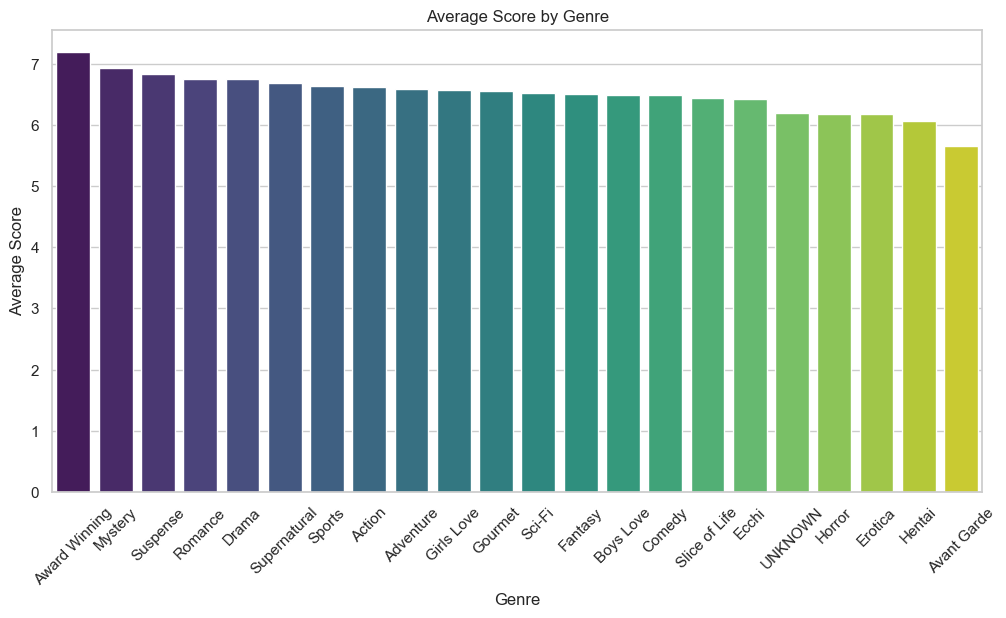

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for statistical data visualization
#import ipywidgets as widgets
from IPython.display import display
# import ipywidgets as widgets  # For interactive widgets in Jupyter Notebook
# from IPython.display import display  # For displaying elements in Jupyter Notebook


# Set the style for seaborn
sns.set(style="whitegrid")

# Load the dataset
anime_data = pd.read_csv('data/anime-dataset-2023.csv')

# Display the first few rows of the dataset
print(anime_data.head())

# Initial analysis
print(anime_data.info())
print(anime_data.describe())
print(anime_data.isnull().sum())

# Handle missing values in the Genres column
anime_data['Genres'] = anime_data['Genres'].fillna(anime_data['Genres'].mode()[0])

# Count the frequency of genres
genres_count = anime_data['Genres'].value_counts()

# Convert the Score column to numeric, handling errors
anime_data['Score'] = pd.to_numeric(anime_data['Score'], errors='coerce')

# Ensure that the Score column does not have missing values after conversion
anime_data['Score'] = anime_data['Score'].fillna(anime_data['Score'].mean())

# Getting the average score by genre
anime_data['Genres'] = anime_data['Genres'].str.split(', ')  # Split genres into lists
anime_exploded = anime_data.explode('Genres')  # Explode the list into separate rows
mean_ratings = anime_exploded.groupby('Genres')['Score'].mean().sort_values(ascending=False)

# Display the average ratings
print(mean_ratings)

# Plot for average scores by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='viridis')
plt.title('Average Score by Genre')
plt.ylabel('Average Score (1 to 10)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

       Genre  Count
0     Action   3732
1  Adventure   2714
2       Cars     98
3     Comedy   5569
4   Dementia    331
       Genre  Count  Average Score
0     Action   3732       5.837742
1  Adventure   2714       6.201429
2       Cars     98       5.622500
3     Comedy   5569       6.210305
4   Dementia    331       5.040839


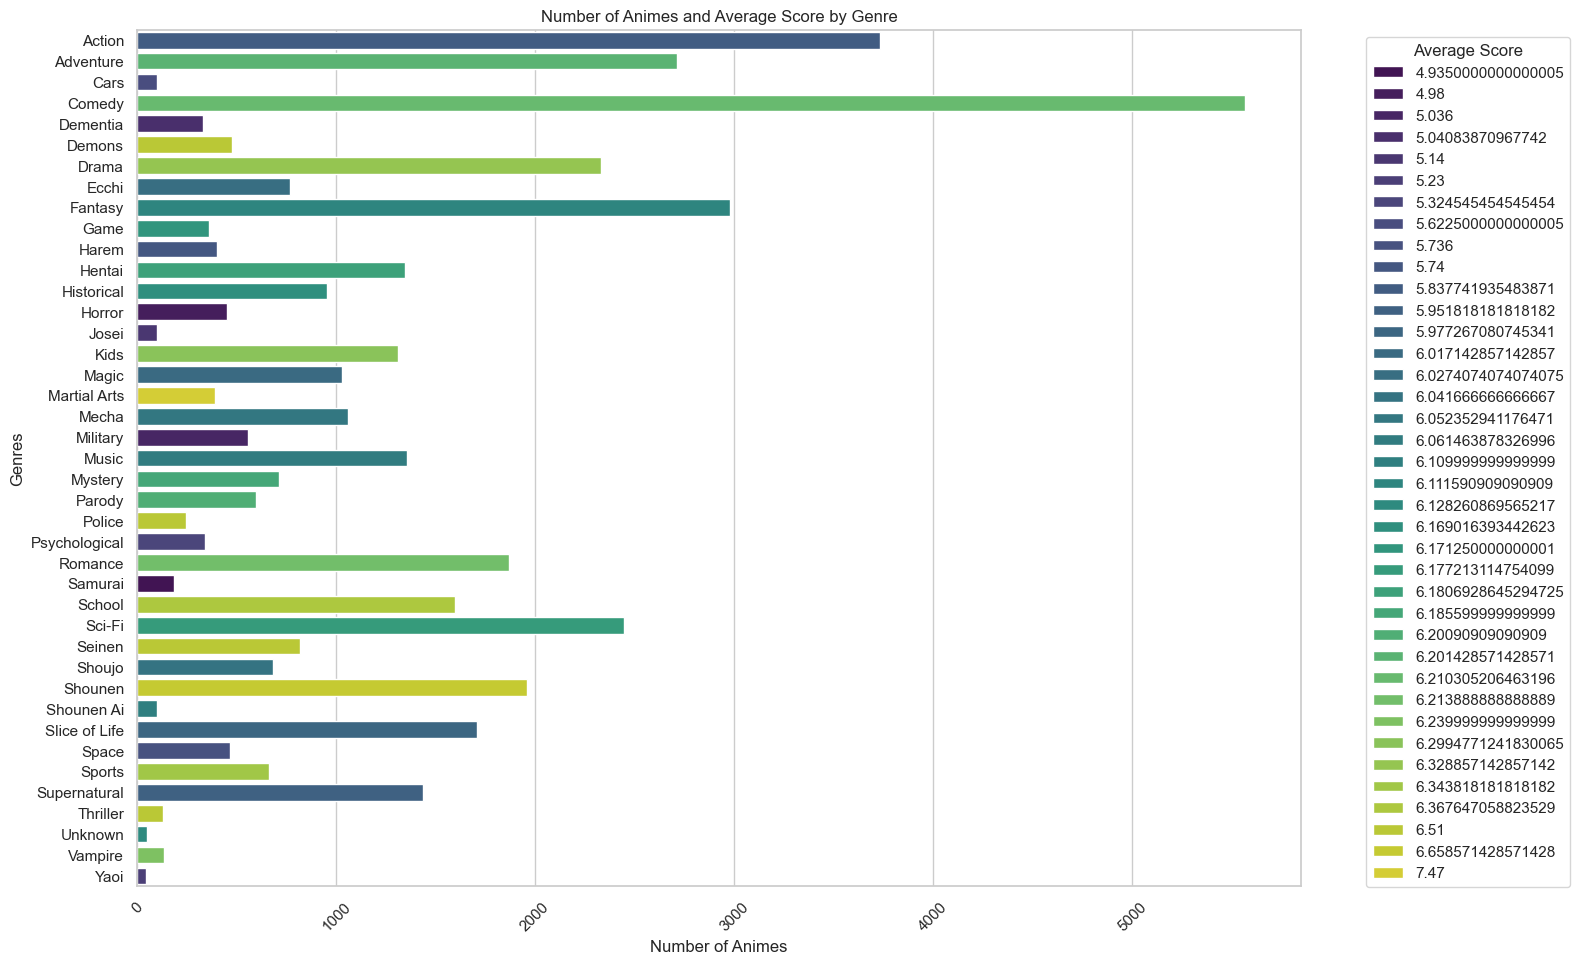

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
anime_data = pd.read_csv('data/anime-filtered.csv')

# Clean the genres by removing quotes and brackets, and stripping spaces
genre_data = anime_data['Genres'].str.get_dummies(sep=', ').sum().reset_index()
genre_data.columns = ['Genre', 'Count']
genre_data['Genre'] = genre_data['Genre'].str.replace(r"[\'\[\]]", "", regex=True).str.strip()

# Check the cleaned genre_data
print(genre_data.head())

# Join average score
genre_scores = anime_data.explode('Genres')
genre_scores['Genres'] = genre_scores['Genres'].str.strip()
average_scores = genre_scores.groupby('Genres')['Score'].mean().reset_index()
average_scores.columns = ['Genre', 'Average Score']

# Merge the count and average score data again
merged_data = pd.merge(genre_data, average_scores, on='Genre')

# Print the merged data to verify the result
print(merged_data.head())

# Plotting the data
plt.figure(figsize=(16, 10))  # Increased the size for better visibility
sns.barplot(data=merged_data, x='Count', y='Genre', hue='Average Score', dodge=False, palette='viridis')
plt.title('Number of Animes and Average Score by Genre')
plt.xlabel('Number of Animes')
plt.ylabel('Genres')
plt.legend(title='Average Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [6]:
#import ipywidgets as widgets
from IPython.display import display

# Get unique genres from the dataset
unique_genres = anime_data['Genres'].str.split(', ').explode().unique()  # Split and get unique genres

# Display available genres as a simple list
print("See the list below for available genres and let us know which genre recommendations you're looking for:")
for genre in sorted(unique_genres):
    print(f"- {genre}")  # Each genre

# Anime recommendation based on genre
def recommend_animes(genre, top_n=10):
    # Filter anime by genre selected in dataset
    genre_animes = anime_data[anime_data['Genres'].str.contains(genre, case=False, na=False)]
    
    # Anime rating by selected genre
    top_animes = genre_animes.sort_values(by='Score', ascending=False).head(top_n)
    
    return top_animes[['Name', 'Score', 'Genres']]

# Top anime by specific genre
def display_top_animes(genre):
    top_animes = recommend_animes(genre)
    if not top_animes.empty:
        display(top_animes)  # 'pandas' formatting
    else:
        print(f"Genre not found! Check the list above for the genres present in the dataset and, if you wish, try again!")

# Set a genre directly instead of using input
selected_genre = "Action"  # Replace with desired genre

# Display top animes for the chosen genre
print(f"Top animes for the genre '{selected_genre}':")
display_top_animes(selected_genre)

See the list below for available genres and let us know which genre recommendations you're looking for:
- Action
- Adventure
- Cars
- Comedy
- Dementia
- Demons
- Drama
- Ecchi
- Fantasy
- Game
- Harem
- Hentai
- Historical
- Horror
- Josei
- Kids
- Magic
- Martial Arts
- Mecha
- Military
- Music
- Mystery
- Parody
- Police
- Psychological
- Romance
- Samurai
- School
- Sci-Fi
- Seinen
- Shoujo
- Shoujo Ai
- Shounen
- Shounen Ai
- Slice of Life
- Space
- Sports
- Super Power
- Supernatural
- Thriller
- Unknown
- Vampire
- Yaoi
- Yuri
Top animes for the genre 'Action':


,Name,Score,Genres
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma..."
13935,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,..."
13364,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho..."
9556,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S..."
6457,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power"
5996,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
7233,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S..."
11464,Gintama.,8.99,"Action, Comedy, Historical, Parody, Samurai, S..."
7221,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.96,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
833,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, S..."


In [7]:
# Load the dataset
anime_data = pd.read_csv('data/anime-filtered.csv')
anime_data['Score'] = anime_data['Score'].replace('UNKNOWN', np.nan)

# Conversion to float, preventing non-numeric scores from being captured
anime_data['Score'] = pd.to_numeric(anime_data['Score'], errors='coerce')

# Display statistics to verify scores
print(anime_data['Score'].describe())

def get_user_ratings(user_id):
    return pd.DataFrame({
        'Name': ['Naruto', 'Cowboy Bebop', 'Attack on Titan'],
        'User_Rating': [8.5, 9.0, 7.5]
    })

def user_based_recommendation(user_id, anime_data, n_recommendations=10):
    user_ratings_df = get_user_ratings(user_id)
    merged_data = anime_data.merge(user_ratings_df, on='Name', how='left')
    
    # Filling null ratings with 0 to avoid problems
    merged_data['User_Rating'] = merged_data['User_Rating'].fillna(0)
    
    # Calculate score
    merged_data['Score'] = merged_data['User_Rating'] * merged_data['Score'].fillna(0)

    # Only animes with score greater than 0
    recommendations = merged_data[merged_data['Score'] > 0].sort_values(by='Score', ascending=False).head(n_recommendations)

    return recommendations[['Name', 'Score', 'Genres']]

def genre_based_recommendation(user_id, anime_data, n_recommendations=10):
    user_ratings_df = get_user_ratings(user_id)
    merged_data = anime_data.merge(user_ratings_df, on='Name', how='left')
    
    # Only animes rated by the user
    user_rated_animes = merged_data[merged_data['User_Rating'].notnull()]
    
    # Genres from animes rated by the user
    user_genres = set(user_rated_animes['Genres'].str.cat(sep=', ').split(', '))
    
    # Filter anime data based on genres
    filtered_anime_data = anime_data[anime_data['Genres'].str.contains('|'.join(user_genres), na=False)]
    
    # Use .loc to avoid SettingWithCopyWarning
    filtered_anime_data = filtered_anime_data.copy()  # Create a copy to avoid warning
    filtered_anime_data.loc[:, 'Recommendation_Score'] = filtered_anime_data['Score'] * filtered_anime_data['Score'].mean()

    # Filter to ensure recommendation score is greater than 0
    recommendations = filtered_anime_data[filtered_anime_data['Recommendation_Score'] > 0].sort_values(by='Recommendation_Score', ascending=False).head(n_recommendations)
    
    return recommendations[['Name', 'Score', 'Genres']]

# Example usage
user_id = 1  # User ID
recommended_animes = user_based_recommendation(user_id, anime_data)
recommended_animes_genre_based = genre_based_recommendation(user_id, anime_data)

# Display recommendations
print("User-Based Recommended Animes for User:")
print(recommended_animes)

print("\nGenre-Based Recommended Animes for User:")
print(recommended_animes_genre_based)


count    14952.000000
mean         6.511526
std          0.807185
min          1.850000
25%          6.080000
50%          6.510000
75%          7.010000
max          9.190000
Name: Score, dtype: float64
User-Based Recommended Animes for User:
            Name   Score                                             Genres
0   Cowboy Bebop  79.020    Action, Adventure, Comedy, Drama, Sci-Fi, Space
10        Naruto  67.235  Action, Adventure, Comedy, Super Power, Martia...

Genre-Based Recommended Animes for User:
                                       Name  Score   
3971       Fullmetal Alchemist: Brotherhood   9.19  \
13935  Shingeki no Kyojin: The Final Season   9.17   
5678                            Steins;Gate   9.11   
9556                               Gintama°   9.10   
6457                 Hunter x Hunter (2011)   9.10   
13364    Shingeki no Kyojin Season 3 Part 2   9.10   
5996                               Gintama'   9.08   
741                    Ginga Eiyuu Densetsu   9.07   


In [8]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user data
user_data = pd.read_csv('data/users-details-2023.csv')
anime_data = pd.read_csv('data/anime-dataset-2023.csv')

# Initial user data structure
print(user_data.head())
print(anime_data.head())

   Mal ID Username  Gender                   Birthday              Location   
0       1    Xinil    Male  1985-03-04T00:00:00+00:00            California  \
1       3  Aokaado    Male                        NaN          Oslo, Norway   
2       4  Crystal  Female                        NaN  Melbourne, Australia   
3       9   Arcane     NaN                        NaN                   NaN   
4      18      Mad     NaN                        NaN                   NaN   

                      Joined  Days Watched  Mean Score  Watching  Completed   
0  2004-11-05T00:00:00+00:00         142.3        7.37       1.0      233.0  \
1  2004-11-11T00:00:00+00:00          68.6        7.34      23.0      137.0   
2  2004-11-13T00:00:00+00:00         212.8        6.68      16.0      636.0   
3  2004-12-05T00:00:00+00:00          30.0        7.71       5.0       54.0   
4  2005-01-03T00:00:00+00:00          52.0        6.27       1.0      114.0   

   On Hold  Dropped  Plan to Watch  Total Entries 

User Data Statistics:
             Mal ID   Days Watched     Mean Score       Watching   
count  7.312900e+05  731282.000000  731282.000000  731282.000000  \
mean   5.070203e+05      24.180819       3.948018       4.765714   
std    3.640147e+05     140.105073       4.137606      20.495890   
min    1.000000e+00       0.000000       0.000000       0.000000   
25%    2.011085e+05       0.000000       0.000000       0.000000   
50%    4.251705e+05       0.200000       0.000000       0.000000   
75%    7.753400e+05      24.800000       8.040000       4.000000   
max    1.291097e+06  105338.600000     255.000000    4358.000000   

           Completed        On Hold        Dropped  Plan to Watch   
count  731282.000000  731282.000000  731282.000000  731282.000000  \
mean       65.953066       3.391615       4.565480      17.547893   
std       186.633286      19.296913      34.915341      90.286927   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000

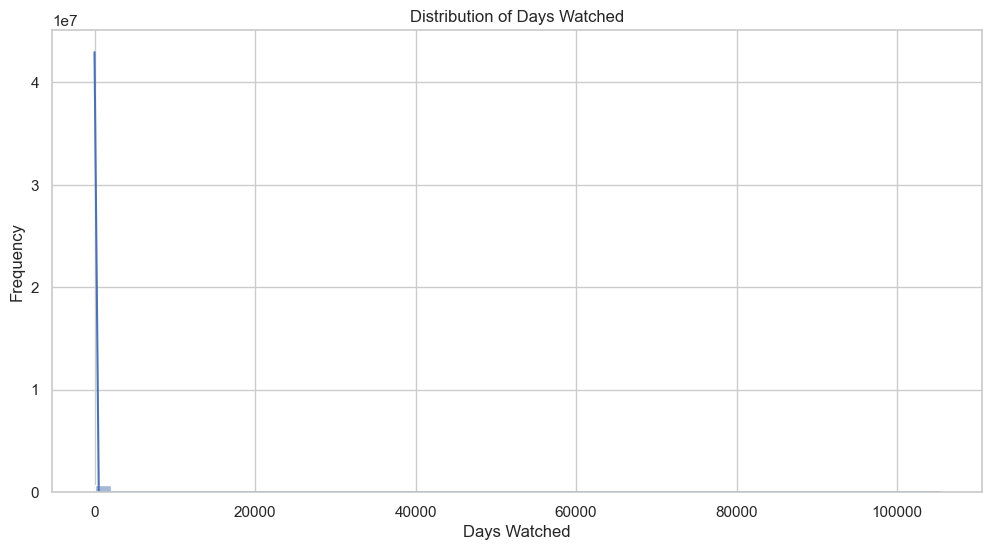

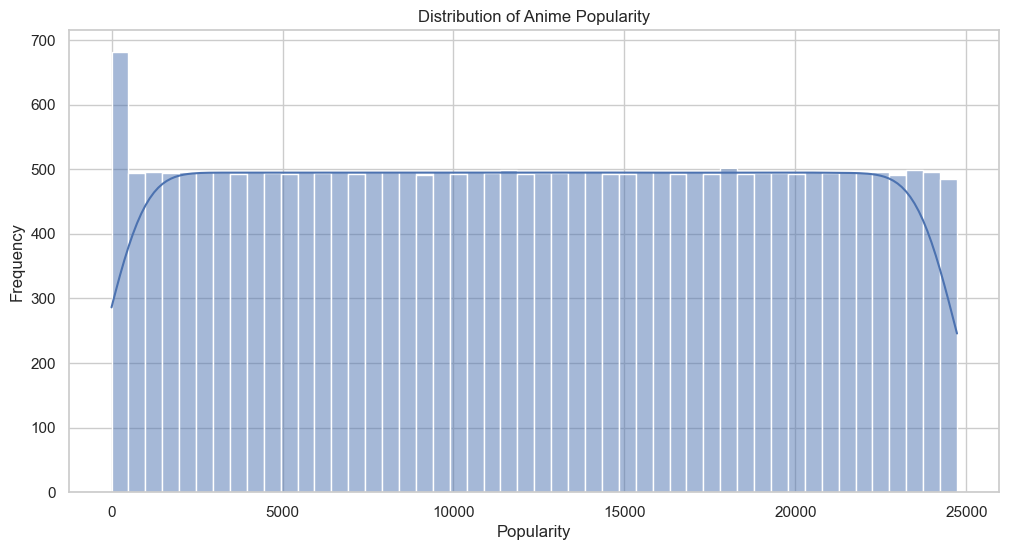


User Data:
   Mal ID Username  Gender                   Birthday              Location   
0       1    Xinil    Male  1985-03-04T00:00:00+00:00            California  \
1       3  Aokaado    Male                        NaN          Oslo, Norway   
2       4  Crystal  Female                        NaN  Melbourne, Australia   
3       9   Arcane     NaN                        NaN               Unknown   
4      18      Mad     NaN                        NaN               Unknown   

                      Joined  Days Watched  Mean Score  Watching  Completed   
0  2004-11-05T00:00:00+00:00         142.3        7.37       1.0      233.0  \
1  2004-11-11T00:00:00+00:00          68.6        7.34      23.0      137.0   
2  2004-11-13T00:00:00+00:00         212.8        6.68      16.0      636.0   
3  2004-12-05T00:00:00+00:00          30.0        7.71       5.0       54.0   
4  2005-01-03T00:00:00+00:00          52.0        6.27       1.0      114.0   

   On Hold  Dropped  Plan to Watch  To

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
user_data = pd.read_csv('data/users-details-2023.csv')
anime_data = pd.read_csv('data/anime-dataset-2023.csv')

# Handle missing values
user_data['Location'] = user_data['Location'].fillna('Unknown')

# Generate descriptive statistics
user_stats = user_data.describe()
anime_stats = anime_data.describe()

# Print statistics
print("User Data Statistics:")
print(user_stats)
print("\nAnime Data Statistics:")
print(anime_stats)

# Graphs: Days watched by genre
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data, x='Days Watched', bins=50, kde=True)
plt.title('Distribution of Days Watched')
plt.xlabel('Days Watched')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Graphs: Popularity of animes
plt.figure(figsize=(12, 6))
sns.histplot(data=anime_data, x='Popularity', bins=50, kde=True)
plt.title('Distribution of Anime Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# View initial data
print("\nUser Data:")
print(user_data.head())

print("\nAnime Data:")
print(anime_data.head())

# Show available usernames
print("\nAvailable Usernames:")
print(user_data['Username'].unique())


# More exploration

# ***About DataSet***

------------------------------------------------------------------------------------- "anime-dataset-2023.csv" -----------------------------------------------------------------------------------------
* anime_id: Unique ID for each anime.
* Name: The name of the anime in its original language.
* English name: The English name of the anime.
* Other name: Native name or title of the anime(can be in Japanese, Chinese or Korean).
* Score: The score or rating given to the anime.
* Genres: The genres of the anime, separated by commas.
* Synopsis: A brief description or summary of the anime's plot.
* Type: The type of the anime (e.g., TV series, movie, OVA, etc.).
* Episodes: The number of episodes in the anime.
* Aired: The dates when the anime was aired.
* Premiered: The season and year when the anime premiered.
* Status: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
* Producers: The production companies or producers of the anime.
* Licensors: The licensors of the anime (e.g., streaming platforms).
* Studios: The animation studios that worked on the anime.
* Source: The source material of the anime (e.g., manga, light novel, original).
* Duration: The duration of each episode.
* Rating: The age rating of the anime.
* Rank: The rank of the anime based on popularity or other criteria.
* Popularity: The popularity rank of the anime.
* Favorites: The number of times the anime was marked as a favorite by users.
* Scored By: The number of users who scored the anime.
* Members: The number of members who have added the anime to their list on the platform.
* Image URL: The URL of the anime's image or poster.

El conjunto de datos ofrece información valiosa para analizar y comprender las características, las calificaciones, la popularidad y la audiencia de varios programas de anime. Al utilizar este conjunto de datos, se puede realizar una amplia gama de análisis, incluida la identificación del anime con las calificaciones más altas, la exploración de los géneros más populares, el examen de la distribución de las calificaciones y la obtención de información sobre las preferencias y tendencias de los espectadores. Además, el conjunto de datos facilita la creación de sistemas de recomendación, análisis de series temporales y agrupamiento para profundizar en las tendencias del anime y el comportamiento de los usuarios.


------------------------------------------------------------------------------------------ **"users-details-2023.csv"** ---------------------------------------------------------------------------------------------

*   Mal ID: Unique ID for each user.
*   Username: The username of the user.
*   Gender: The gender of the user.
*   Birthday: The birthday of the user (in ISO format).
*   Location: The location or country of the user.
*   Joined: The date when the user joined the platform (in ISO format).
*   Days Watched: The total number of days the user has spent watching anime.
*   Mean Score: The average score given by the user to the anime they have watched.
*   Watching: The number of anime currently being watched by the user.
*   Completed: The number of anime completed by the user.
*   On Hold: The number of anime on hold by the user.
*   Dropped: The number of anime dropped by the user.
*   Plan to Watch: The number of anime the user plans to watch in the future.
*   Total Entries: The total number of anime entries in the user's list.
*   Rewatched: The number of anime rewatched by the user.
*   Episodes Watched: The total number of episodes watched by the user.

El conjunto de datos de detalles de usuario proporciona información valiosa para analizar el comportamiento y las preferencias de los usuarios en la plataforma de anime. Al examinar las puntuaciones medias y los géneros de anime, puede obtener información sobre las preferencias de los usuarios. Los usuarios pueden segmentarse en diferentes grupos en función de su comportamiento de visualización, como usuarios activos y espectadores ocasionales. Se pueden crear sistemas de recomendaciones personalizados utilizando las listas de visualización completadas y planificadas de los usuarios. El análisis basado en la ubicación revela la popularidad del anime y la participación de los usuarios en varios países. Se pueden identificar tendencias en el comportamiento de visualización, la retención de usuarios y las diferencias basadas en el género en las preferencias de anime. Además, puede explorar los hábitos de repetición de visualización y realizar análisis de series temporales para comprender los patrones de participación de los usuarios a lo largo del tiempo.

-------------------------------------------------------------------------------------------- "users-score-2023.csv" -----------------------------------------------------------------------------------------------

*  user_id: Unique ID for each user.
*  Username: The username of the user.
*  anime_id: Unique ID for each anime.
*  Anime Title: The title of the anime.
*  rating: The rating given by the user to the anime.

El conjunto de datos de detalles de usuario proporciona información valiosa para analizar el comportamiento y las preferencias de los usuarios en la plataforma de anime. Al examinar las puntuaciones medias y los géneros de anime, puede obtener información sobre las preferencias de los usuarios. Usuarios El conjunto de datos de puntuación de usuario permite diversos análisis y conocimientos sobre las interacciones de los usuarios con el anime. Al examinar las calificaciones de los usuarios para diferentes títulos de anime, puede identificar anime popular y con altas calificaciones entre los usuarios. Además, puede explorar las preferencias de los usuarios y los patrones de visualización de títulos de anime específicos. Este conjunto de datos también forma la base para crear sistemas de recomendación basados ​​en las calificaciones de los usuarios, lo que ayuda a sugerir anime que se alinea con los gustos individuales. Además, puede realizar un filtrado colaborativo y un análisis de similitud para descubrir patrones de intereses de usuarios similares. En general, este conjunto de datos ofrece información valiosa para comprender la participación y las preferencias de los usuarios en la plataforma de anime.

# ***Importing Libraries***

pandas
numpy
matplotlib
seaborn
wordcloud
langdetect
datetime
pickle
scikit-learn


In [2]:
#leer y manipular el dataset
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# Preproceso de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Entrenamiento Modelo
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Importar módulos necesarios para el filtrado colaborativo
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter

## Importar módulos necesarios para el filtrado basado en contenido
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# ***Lectura del conjunto de datos***
https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

In [4]:
df_anime=pd.read_csv('data/anime-dataset-2023.csv')
print('Shape of df_anime:',df_anime.shape)
pd.set_option('Display.max_columns', None)
df_anime.head()

Shape of df_anime: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [6]:
df_user=pd.read_csv('data/users-details-2023.csv')
print('Shape of df_user',df_user.shape)
pd.set_option('display.max_columns', None)
df_user.head()

Shape of df_user (731290, 16)


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [7]:
df_score=pd.read_csv('data/users-score-2023.csv')
print('Shape of the df_score',df_score.shape)
df_score.head()

Shape of the df_score (24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


# *Data Exploration*

Comenzamos buscando valores nulos para limpiar el DataSet

In [8]:
df_anime.info()
df_anime.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

anime_id        False
Name            False
English name    False
Other name      False
Score           False
Genres          False
Synopsis        False
Type            False
Episodes        False
Aired           False
Premiered       False
Status          False
Producers       False
Licensors       False
Studios         False
Source          False
Duration        False
Rating          False
Rank            False
Popularity      False
Favorites       False
Scored By       False
Members         False
Image URL       False
dtype: bool

In [9]:
df_anime.duplicated().sum()

0

Afortunadamente, el conjunto de datos no contiene ningún valor nulo, así que intentemos ordenar los animes por rango para obtener más información.

In [10]:
anime_sorted_rank = df_anime.sort_values('Rank',ascending = True)[['Name','Score','Rank','Scored By','Popularity','Type','Genres','Synopsis']]
anime_sorted_rank.head(10)

,Name,Score,Rank,Scored By,Popularity,Type,Genres,Synopsis
24904,Shijuuku Nichi,UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,A music video for the song Shijuuku Nichi by S...
24500,Free Falling,UNKNOWN,0.0,UNKNOWN,0,Music,Fantasy,Music video for TOMORROW X TOGETHER's (TXT) so...
24499,A Beautiful Day,UNKNOWN,0.0,UNKNOWN,0,Music,Boys Love,Music video of the song A Beautiful Day for th...
24498,Night Flower,UNKNOWN,0.0,UNKNOWN,0,Music,Boys Love,Music video for YEEUN AHN's song Night Flower ...
24494,The Little Name,UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Music video for ADORA's song The Little Name.
24468,Ridin' (IMLAY Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,NCT DREAM 엔시티 드림 'Ridin' (IMLAY Remix)' Visual...
24464,Bad Boy (Slom Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for Red Velvet's Bad Boy (Slom Remix).
24463,Bad Boy (nomad Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for Red Velvet's Bad Boy (nomad Rem...
24462,맛 (Hot Sauce) (MINIMONSTER Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,Visualizer for NCT DREAM's MINIMONSTER Remix.
24461,Bambi (h4rdy Remix),UNKNOWN,0.0,UNKNOWN,0,Music,UNKNOWN,"BAEKHYUN's ""iScreaM Vol.8 : Bambi Remixes"" is ..."


In [11]:
Type_Counts = df_anime['Type'].value_counts()
Type_Counts.head()

Type
TV       7597
Movie    4381
OVA      4076
ONA      3533
Music    2686
Name: count, dtype: int64

Aparentemente hay campos "UKNOWN" en lugar de NULLS. Otra cosa a destacar es que Rank obtiene el valor 0 con la combinación de "Score" y "Scored by" que tiene "UNKNOWN". Por lo tanto, decidí eliminar todos los "UNKNOWN" de la columna y solo mantener los animes transmitidos en TV y películas, ya que algunos de ellos son populares, como Kimi no NA WA y las películas del estudio "Ghibli" (una de sus películas ganó un premio Oscar).

In [12]:
df_anime = df_anime[(df_anime['Type'] == 'TV') | (df_anime['Type'] == 'Movie') ]
df_anime = df_anime[(df_anime['Score'] != 'UNKNOWN') | (df_anime['Scored By'] != 'UNKNOWN')]
df_anime
# Step 1: Identify animes with known score values and scored by in the anime table and keep animes with type 'movie' or 'TV'
valid_anime_ids = df_anime[(df_anime['Score'] != 'UNKNOWN') & (df_anime['Scored By'] != 'UNKNOWN') & (df_anime['Type'].isin(['Movie', 'TV']))]['anime_id']

# Step 2: Filter out the corresponding rows from the users table
df_score = df_score[df_score['anime_id'].isin(valid_anime_ids)]

# Step 3: Filter out the corresponding rows from the anime table
df_anime = df_anime[df_anime['anime_id'].isin(valid_anime_ids)]


In [13]:
df_anime.shape

(6957, 24)

In [14]:
df_score.shape

(20031107, 5)

Listo, con nuestro dataframe algo más limpio ahora debemos ordenar con calma

In [15]:
anime_sorted_rank = df_anime.sort_values('Rank',ascending = True)

Vale, tiene muy buena pinta ¿verdad? Pues mirad con más detalle. El puesto número 1 lo ostenta Fullmetal Alchemist: Brotherhood, pero... ¿Por qué salta del puesto 1 al puesto 10? y luego al puesto 100.
Si analizamos con más detalle, se comporta como un String, y es que lo es. Al parecer no nos dimos cuenta de que en el índice las columnas que deberían ser números (rank, score, scoring by) son como objetos. Así que convertiremos Score y Scored by a números. Rank no porque tenemos valores en 'UNKNOWN' que calcularemos a mano

In [16]:
anime_sorted_rank.loc[:,['Score','Scored By']] = anime_sorted_rank.loc[:,['Score','Scored By']].astype(float)
anime_sorted_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
3961,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.1,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),1.0,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...
6456,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,9.04,"Action, Adventure, Fantasy",Hunters devote themselves to accomplishing haz...,TV,148.0,"Oct 2, 2011 to Sep 24, 2014",fall 2011,Finished Airing,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,10.0,10,200265,1651790.0,2656870,https://cdn.myanimelist.net/images/anime/1337/...
16184,40664,Shoujo☆Kageki Revue Starlight Movie,Revue Starlight: The Movie,劇場版 少女☆歌劇 レヴュースタァライト,8.55,UNKNOWN,With the arrival of a new generation of talent...,Movie,1.0,"Jun 4, 2021",UNKNOWN,Finished Airing,Bushiroad,Sentai Filmworks,Kinema Citrus,Original,2 hr,PG-13 - Teens 13 or older,100.0,4987,676,6475.0,16202,https://cdn.myanimelist.net/images/anime/1655/...
8776,22975,Kaibutsu-kun: Demon no Ken,UNKNOWN,怪物くん デーモンの剣,5.72,"Comedy, Horror",Based on the shounen manga by Fujiko Fujio.\n\...,Movie,1.0,"Mar 13, 1982",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Shin-Ei Animation,Unknown,55 min,G - All Ages,10004.0,15203,0,112.0,468,https://cdn.myanimelist.net/images/anime/10/59...
5267,8213,Hoka Hoka Kazoku,The Affectuous Family,ほかほか家族,5.72,Comedy,Short comedic stories about events and the dai...,TV,1428.0,"Oct 1, 1976 to Mar 31, 1982",fall 1976,Finished Airing,UNKNOWN,UNKNOWN,Eiken,Unknown,5 min per ep,G - All Ages,10005.0,13154,1,267.0,853,https://cdn.myanimelist.net/images/anime/2/212...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,8861,"Yosuga no Sora: In Solitude, Where We Are Leas...",Yosuga no Sora,"ヨスガノソラ In solitude, where we are least alone.",6.07,"Drama, Romance, Erotica","Due to a sudden accident, twins Haruka and Sor...",TV,12.0,"Oct 4, 2010 to Dec 20, 2010",fall 2010,Finished Airing,"Starchild Records, Studio Mausu, GANSIS, PRA",Media Blasters,feel.,Visual novel,25 min per ep,R+ - Mild Nudity,UNKNOWN,427,2317,255614.0,479861,https://cdn.myanimelist.net/images/anime/5/762...
2159,2360,Choujin Densetsu Urotsukidouji 2,Urotsukidoji II: Legend of the Demon Womb (movie),超神伝説うろつき童子 魔胎伝,5.84,"Fantasy, Horror, Sci-Fi, Hentai","During World War 2, the Nazis attempted to bre...",Movie,1.0,"Jul 21, 1991",UNKNOWN,Finished Airing,UNKNOWN,Central Park Media,Phoenix Entertainment,Unknown,1 hr 28 min,Rx - Hentai,UNKNOWN,8820,7,1685.0,3740,https://cdn.myanimelist.net/images/anime/4/248...
15684,39761,Saezuru Tori wa Habatakanai: The Clouds Gather,UNKNOWN,囀る鳥は羽ばたかない The clouds gather,7.41,"Boys Love, Drama, Erotica","Yashiro, the ruthlessly efficient leader of th...",Movie,1.0,"Feb 15, 2020",UNKNOWN,Finished Airing,Blue Lynx,Sentai Filmworks,GRIZZLY,Manga,1 hr 25 min,R+ - Mild Nudity,UNKNOWN,3475,305,13822.0,36217,https://cdn.myanimelist.net/images/anime/1070/...
9413,26081,Yasuji no Pornorama: Yacchimae!!,UNKNOWN,ヤスジのポルノラマ やっちまえ!!,5.17,Hentai,Based on the manga by Tanioka Yasuji.\n\nJapan...,Movie,1.0,"Sep 24, 1971",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Manga,1 hr 36 min,R+ - Mild Nudity,UNKNOWN,13148,3,227.0,856,https://cdn.myanimelist.net/images/anime/1062/...


Ahora debemos centrarnos en obtener el ranking real de nuestros datos, incluidos todos los "DESCONOCIDOS", para los que utilizaremos la fórmula de ponderación de puntaje. Con esto podremos ponderar el "puntaje" en función de la cantidad de personas que han calificado el anime ("puntuarlo por"). Esto ayudaría a equilibrar los animes con puntajes altos pero calificaciones bajas, frente a aquellos con calificaciones altas pero quizás un puntaje ligeramente inferior.
Puntuación ponderada = Rango × ( Puntuar por Puntuar por máximo en el conjunto de datos)
)

In [17]:
def PP (score, scoreby, maxscoreby):
    return score * (scoreby/maxscoreby)

max_score_by = anime_sorted_rank['Scored By'].max()
anime_clean_rank = anime_sorted_rank.copy()
anime_clean_rank['Rank'] = anime_clean_rank.apply(lambda row: PP(row['Score'], row['Scored By'], max_score_by), axis=1)
anime_clean_rank = anime_clean_rank.sort_values('Rank', ascending= False).reset_index(drop = True)
anime_clean_rank['Rank Number'] = range(1, len(anime_clean_rank) + 1)
anime_clean_rank = anime_clean_rank.loc[:]
anime_clean_rank.head(20)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,"Apr 7, 2013 to Sep 29, 2013",spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,"Oct 4, 2006 to Jun 27, 2007",fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.1,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.5,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,"Oct 5, 2015 to Dec 21, 2015",fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.5,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,"Apr 6, 2019 to Sep 28, 2019",spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
5,32281,Kimi no Na wa.,Your Name.,君の名は。,8.85,"Award Winning, Drama, Supernatural","Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1.0,"Aug 26, 2016",UNKNOWN,Finished Airing,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,1 hr 46 min,PG-13 - Teens 13 or older,6.010267,11,87268,1807089.0,2597495,https://cdn.myanimelist.net/images/anime/5/870...,6
6,31964,Boku no Hero Academia,My Hero Academia,僕のヒーローアカデミア,7.89,Action,"The appearance of ""quirks,"" newly discovered s...",TV,13.0,"Apr 3, 2016 to Jun 26, 2016",spring 2016,Finished Airing,"Dentsu, Mainichi Broadcasting System, Movic, T...",Funimation,Bones,Manga,24 min per ep,PG-13 - Teens 13 or older,5.864562,6,53389,1977824.0,2882333,https://cdn.myanimelist.net/images/anime/10/78...,7
7,20,Naruto,Naruto,ナルト,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",fall 2002,Finished Airing,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,5.656478,8,76343,1883772.0,2717330,https://cdn.myanimelist.net/images/anime/13/17...,8
8,25777,Shingeki no Kyojin Season 2,Attack on Titan Season 2,進撃の巨人 Season2,8.5,"Action, Drama, Suspense","For centuries, humanity has been hunted by gia...",TV,12.0,"Apr 1, 2017 to Jun 17, 2017",spring 2017,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),5.626355,12,20899,1761316.0,2566796,https://cdn.myanimelist.net/images/anime/4/841...,9
9,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,9.04,"Action, Adventure,

Ahora solo nos falta algo que habíamos dejado fuera, las fechas. Si revisamos la columna en detalle veremos que hay distintos tipos de fechas, por lo que las estandarizaremos.

In [18]:
import datetime
from datetime import date

def estandarizar_fechas(fecha):

    if " to " in fecha:
        fecha = fecha.split(" to ")[0]

    formats = ("%b %d, %Y", "%b %d %Y", "%m/%d/%Y", "%Y")

    for fmt in formats:
        try:
            return datetime.datetime.strptime(fecha, fmt).date()
        except ValueError:
            pass

    return datetime.date(1900, 1, 1)

anime_clean_rank["Aired"] = anime_clean_rank["Aired"].apply(estandarizar_fechas)
anime_clean_rank = anime_clean_rank[anime_clean_rank['Aired'] > date(1900, 1, 1)]
anime_clean_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.1,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.5,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.5,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,30408,Tokyo SOS,UNKNOWN,tokyoSOS,4.78,Avant Garde,The fourth anthology work by animation collect...,Movie,1.0,2011-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,11 min,G - All Ages,0.000205,16888,0,114.0,326,https://cdn.myanimelist.net/images/anime/1410/...,6953
6953,42576,Houkago Pilot,UNKNOWN,放課後（パイロット版）,4.9,Slice of Life,A bizarre depiction of after-school activities...,Movie,1.0,2008-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,2 min,PG-13 - Teens 13 or older,0.000199,18481,0,108.0,223,https://cdn.myanimelist.net/images/anime/1694/...,6954
6954,34115,Hitori de Nayamanaide Issho ni Kangaeyou,UNKNOWN,一人で悩まないで一緒に考えよう,5.07,Drama,A commercial aired at 109 Cinemas in Kawasaki ...,Movie,1.0,2013-01-01,UNKNOWN,Finished Airing,Studio RE:Map,UNKNOWN,UNKNOWN,Original,15 sec,G - All Ages,0.000198,17994,1,104.0,250,https://cdn.myanimelist.net/images/anime/5/820...,6955
6955,42272,Karasu,UNKNOWN,鴉,4.97,Avant Garde,Movie that uses a crow as a motif and Kyoto sc...,Movie,1.0,1992-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,4 min,G - All Ages,0.000192,18207,0,103.0,238,https://cdn.myanimelist.net/images/anime/1243/...,6956


Otro tema interesante que podemos hacer para limpiar mejor nuestros datos es limitar las fechas de emisión de los animes para evitar animes con un ranking bajo o puntuados por ser muy antiguos y poco conocidos. Pero... ¿Por dónde debemos cortar?

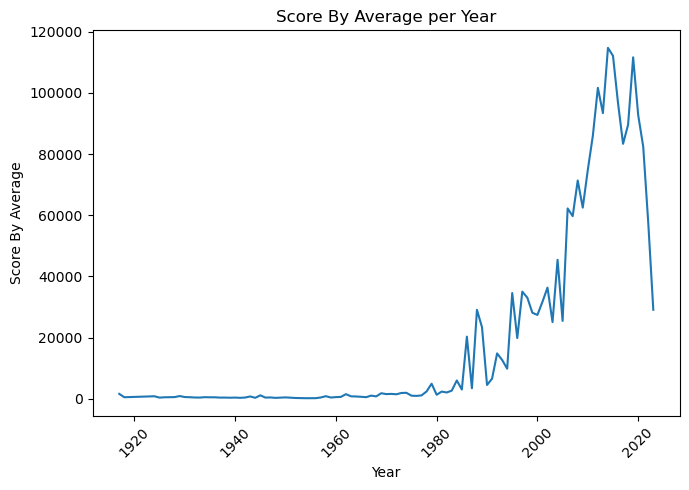

In [19]:
anime_year_helper = anime_clean_rank.copy()
anime_year_helper['Aired'] = pd.to_datetime(anime_year_helper['Aired'])
anime_year_helper['Year'] = anime_year_helper['Aired'].dt.year
score_by_year = anime_year_helper.groupby('Year')['Scored By'].mean()
fig, ax = plt.subplots(figsize=(7, 5))
score_by_year.plot(kind='line', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Score By Average')
ax.set_title('Score By Average per Year')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como podemos ver, el anime de principios de los 80 ya está empezando a tener una buena calificación promedio por persona. Por lo tanto, restringiremos nuestro marco de datos a esa fecha.

In [20]:
anime_clean_rank = anime_clean_rank[anime_clean_rank['Aired'] > date(1980, 1, 1)]
anime_clean_rank

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1
1,1535,Death Note,Death Note,デスノート,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.1,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.5,"Action, Comedy",The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.5,"Action, Award Winning, Fantasy","Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,30408,Tokyo SOS,UNKNOWN,tokyoSOS,4.78,Avant Garde,The fourth anthology work by animation collect...,Movie,1.0,2011-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,11 min,G - All Ages,0.000205,16888,0,114.0,326,https://cdn.myanimelist.net/images/anime/1410/...,6953
6953,42576,Houkago Pilot,UNKNOWN,放課後（パイロット版）,4.9,Slice of Life,A bizarre depiction of after-school activities...,Movie,1.0,2008-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,2 min,PG-13 - Teens 13 or older,0.000199,18481,0,108.0,223,https://cdn.myanimelist.net/images/anime/1694/...,6954
6954,34115,Hitori de Nayamanaide Issho ni Kangaeyou,UNKNOWN,一人で悩まないで一緒に考えよう,5.07,Drama,A commercial aired at 109 Cinemas in Kawasaki ...,Movie,1.0,2013-01-01,UNKNOWN,Finished Airing,Studio RE:Map,UNKNOWN,UNKNOWN,Original,15 sec,G - All Ages,0.000198,17994,1,104.0,250,https://cdn.myanimelist.net/images/anime/5/820...,6955
6955,42272,Karasu,UNKNOWN,鴉,4.97,Avant Garde,Movie that uses a crow as a motif and Kyoto sc...,Movie,1.0,1992-01-01,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,4 min,G - All Ages,0.000192,18207,0,103.0,238,https://cdn.myanimelist.net/images/anime/1243/...,6956


**Análisis exploratorio simple**

Ahora pasaremos a realizar un análisis simple para encontrar datos interesantes dentro de este conjunto de datos

**Análisis de estudios**

Observando nuestro conjunto de datos nos daremos cuenta que un anime puede ser creado por varios estudios, como es el caso de Neon Genesis Evangeion el cual fue animado por Gainax y Tatsunoko Production, por otro lado también vemos que la mayoría de animes tienen varios géneros. Así que para un mejor análisis desestructuraremos esas columnas.

In [21]:
df_anime_expanded = anime_clean_rank.copy()

genres_expanded = df_anime_expanded["Genres"].str.get_dummies(sep=", ")
df_anime_expanded = df_anime_expanded.join(genres_expanded)
df_anime_expanded = df_anime_expanded.drop("Genres", axis=1)
df_anime_expanded = df_anime_expanded.rename(columns={'Type': 'Medio Emision'})

In [22]:
def split_studios(x):
    return x.split(", ")
df_anime_expanded["Studios"] = df_anime_expanded["Studios"].apply(split_studios)
df_anime_expanded = df_anime_expanded.explode('Studios').reset_index(drop=True)

df_anime_expanded.head()

,anime_id,Name,English name,Other name,Score,Synopsis,Medio Emision,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Rank Number,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,Girls Love,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,8.54,"Centuries ago, mankind was slaughtered to near...",TV,25.0,2013-04-07,spring 2013,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),8.540000,1,163844,2660903.0,3744541,https://cdn.myanimelist.net/images/anime/10/47...,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1535,Death Note,Death Note,デスノート,8.62,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,2006-10-04,fall 2006,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),8.485807,2,167586,2619479.0,3713315,https://cdn.myanimelist.net/images/anime/9/945...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.1,After a horrific alchemy experiment goes wrong...,TV,64.0,2009-04-05,spring 2009,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),6.908284,3,217606,2020030.0,3176556,https://cdn.myanimelist.net/images/anime/1208/...,3,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,30276,One Punch Man,One Punch Man,ワンパンマン,8.5,The seemingly unimpressive Saitama has a rathe...,TV,12.0,2015-10-05,fall 2015,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,24 min per ep,R - 17+ (violence & profanity),6.807592,4,62408,2131099.0,3058666,https://cdn.myanimelist.net/images/anime/12/76...,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,38000,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,鬼滅の刃,8.5,"Ever since the death of his father, the burden...",TV,26.0,2019-04-06,spring 2019,Finished Airing,"Aniplex, Shueisha",Aniplex of America,ufotable,Manga,23 min per ep,R - 17+ (violence & profanity),6.207114,7,88375,1943121.0,2808712,https://cdn.myanimelist.net/images/anime/1286/...,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Los estudios involucrados en los 200 mejores animes hasta 2023 vs. Estudios involucrados en los 200 últimos animes hasta 2023

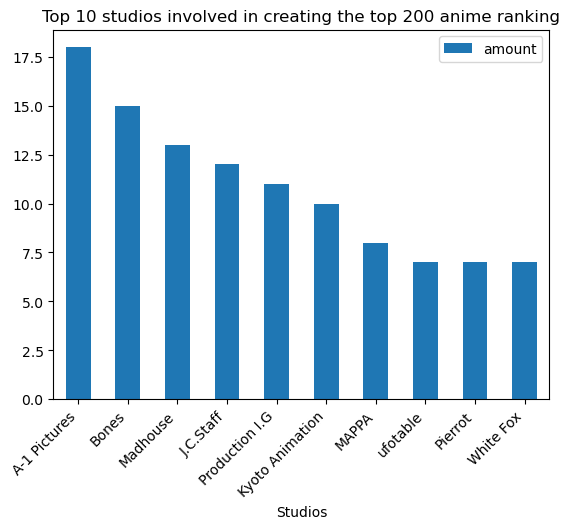

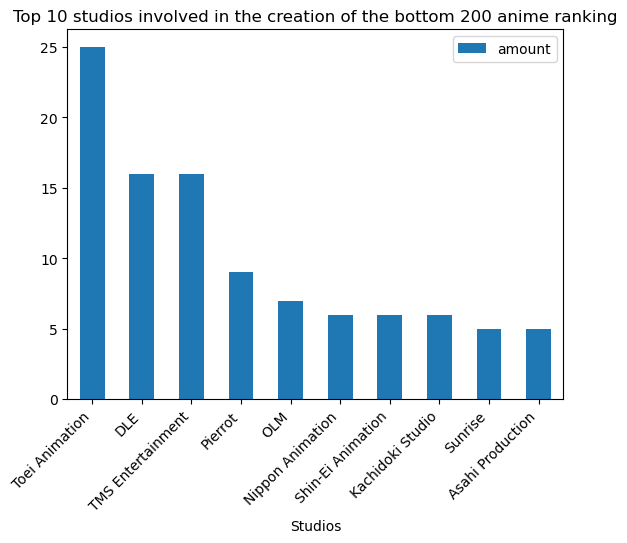

In [23]:
muestra_top = df_anime_expanded.head(200)
top_studios = (
    muestra_top.groupby('Studios').Name.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)

muestra_bottom = (
    df_anime_expanded[df_anime_expanded['Studios'] != 'UNKNOWN']
        .sort_values('Rank Number', ascending = False)
        .head(200)
)

bottom_studios = (
    muestra_bottom.groupby('Studios').Name.count()
        .reset_index(name='amount')
        .sort_values('amount', ascending = False)
        .head(10)
)


top_studios.plot(kind = 'bar', x = 'Studios', title='Top 10 studios involved in creating the top 200 anime ranking')
plt.xticks(rotation=45, ha='right')
bottom_studios.plot(kind = 'bar', x= 'Studios', title='Top 10 studios involved in the creation of the bottom 200 anime ranking')
plt.xticks(rotation=45, ha='right')
plt.show()

Es interesante ver los de arriba y los de abajo, pero la participación en ellos no los convierte en los participantes de los animes con mejores puntuaciones generales, ya que solo nos hemos medido a partir de los 200 de cada lado. Así que, para tener una visión general, tomaremos el promedio de todo el conjunto de datos.

<Axes: title={'center': 'Top 20 studios with the best average in animes'}, xlabel='Studios'>

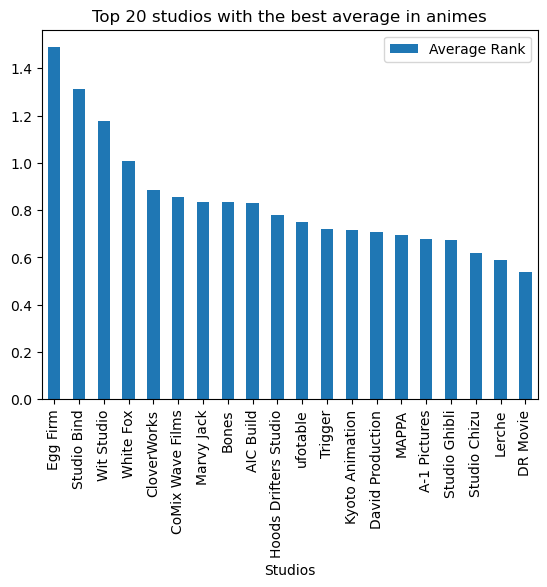

In [24]:
best_studios = df_anime_expanded.groupby('Studios')['Rank'].mean().reset_index()
best_studios_df = best_studios.rename(columns={'Rank': 'Average Rank'}).sort_values('Average Rank',ascending = False).reset_index(drop= True)
best_studios_df
best_studios_df.head(20).plot(kind= 'bar', x= 'Studios', y= 'Average Rank', title='Top 20 studios with the best average in animes')


Por lo tanto, ser parte del top 200 de anime no te da la misma clasificación que el promedio en todo el conjunto de datos de anime. Esto puede deberse a la cantidad de animes con una calificación considerable fuera del top o incluso participación dentro del top 200 de animes pero que no llegaron a los 10 estudios principales.

In [25]:
df_long = pd.melt(df_anime_expanded, id_vars=['Name', 'Studios', 'Rank'],
                  value_vars=['Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet',
       'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Action',
       'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports',
       'Supernatural', 'Suspense'],
                  var_name='Genre', value_name='Present')

# Filter only rows where a gender is present (assuming you use 1 or True to indicate presence)
df_long = df_long[df_long['Present'] == 1]

# Group by study and genre, and count the occurrences
genre_count_by_studio = df_long.groupby(['Studios', 'Genre']).size().reset_index(name='Count')

top_genres_by_studio = genre_count_by_studio.groupby('Studios').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

top_genres_by_studio

,Studios,Genre,Count
0,10Gauge,Slice of Life,1
1,10Gauge,Sports,1
2,8bit,Action,18
3,8bit,Comedy,13
4,8bit,Fantasy,13
...,...,...,...
1257,ufotable,Action,29
1258,ufotable,Fantasy,18
1259,ufotable,Supernatural,15
1260,yell,Action,1


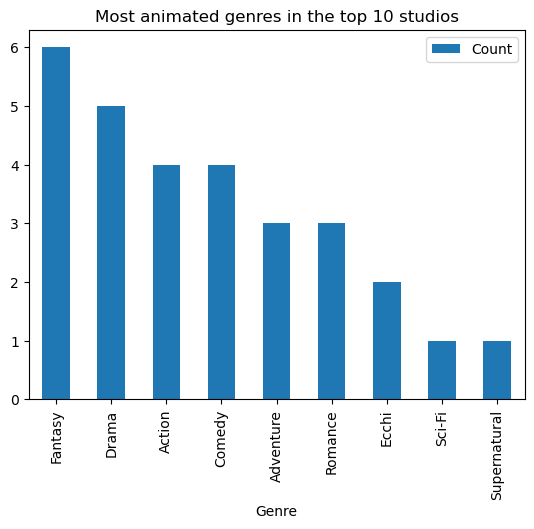

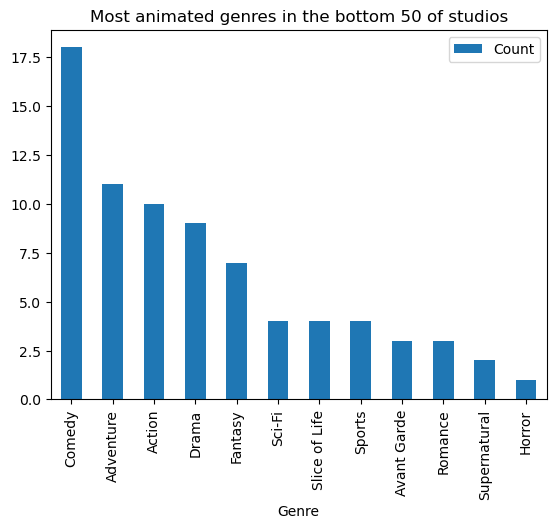

In [26]:
top_studios_animes = best_studios_df.head(10).loc[:,'Studios'].tolist()
bottom_studios_animes = best_studios_df.sort_values('Average Rank', ascending = True).head(50).loc[:,'Studios'].tolist()

top_gen_of_top = top_genres_by_studio[top_genres_by_studio['Studios'].isin(top_studios_animes)]
top_gen_of_bottom = top_genres_by_studio[top_genres_by_studio['Studios'].isin(bottom_studios_animes)]

top_to_graph = top_gen_of_top.groupby('Genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
bottom_to_graph = top_gen_of_bottom.groupby('Genre')['Count'].count().reset_index().sort_values('Count',ascending = False)
top_to_graph.plot(kind='bar',x='Genre', y= 'Count', title='Most animated genres in the top 10 studios')
bottom_to_graph.plot(kind='bar',x='Genre', y= 'Count', title='Most animated genres in the bottom 50 of studios')
plt.show()

Al parecer los estudios del top 10 se caracterizan por animar animes de tipo Fantasía, Drama y Acción. Mientras que los animes del bottom 50 se enfocaron más en Comedia, Aventura y Acción.
Para finalizar, veremos la distribución de géneros en los animes.

In [27]:
df_anime_only = df_anime_expanded.drop_duplicates(subset='Name', keep='first')
df_anime_only = pd.melt(df_anime_only, id_vars=['Name', 'Studios', 'Rank'],
                  value_vars=['Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet',
       'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Action',
       'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy',
       'Drama', 'Ecchi', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports',
       'Supernatural', 'Suspense'],
                  var_name='Genre', value_name='Present')
df_anime_only = df_anime_only[df_anime_only['Present'] == 1]
df_anime_only = df_anime_only.groupby(['Name','Rank', 'Genre']).size().reset_index(name='Count')
df_anime_only = df_anime_only.sort_values('Rank', ascending = False).reset_index(drop = True)
df_anime_only

,Name,Rank,Genre,Count
0,Shingeki no Kyojin,8.540000,Drama,1
1,Shingeki no Kyojin,8.540000,Award Winning,1
2,Shingeki no Kyojin,8.540000,Suspense,1
3,Shingeki no Kyojin,8.540000,Action,1
4,Death Note,8.485807,Supernatural,1
...,...,...,...,...
14402,Houkago Pilot,0.000199,Slice of Life,1
14403,Hitori de Nayamanaide Issho ni Kangaeyou,0.000198,Drama,1
14404,Karasu,0.000192,Avant Garde,1
14405,Imagination of Marathon Runners,0.000192,Sports,1


<Axes: title={'center': 'Distribution of genres in all anime data'}, xlabel='Genre'>

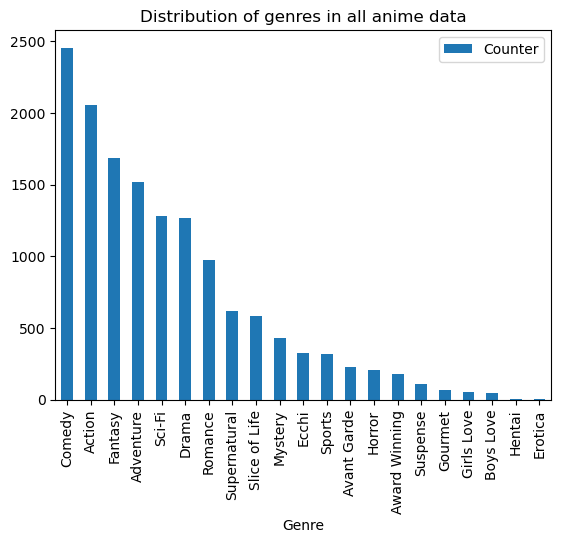

In [28]:
df_count_genre_anime = df_anime_only.groupby('Genre')['Count'].count().reset_index(name = 'Counter')
df_count_genre_anime = df_count_genre_anime.sort_values('Counter', ascending = False)
df_count_genre_anime.plot(kind='bar', x='Genre', y = 'Counter', title= 'Distribution of genres in all anime data')

Es interesante saber que el género de comedia es el más frecuente en el anime, sin embargo no es el género que los estudios con mejor ranking hacen con frecuencia. Ahora por fin veremos los géneros de los 100 mejores animes del ranking para ver si tienen una similitud con los géneros en general

<Axes: title={'center': 'Genre distribution in the top 200 animes'}, xlabel='Genre'>

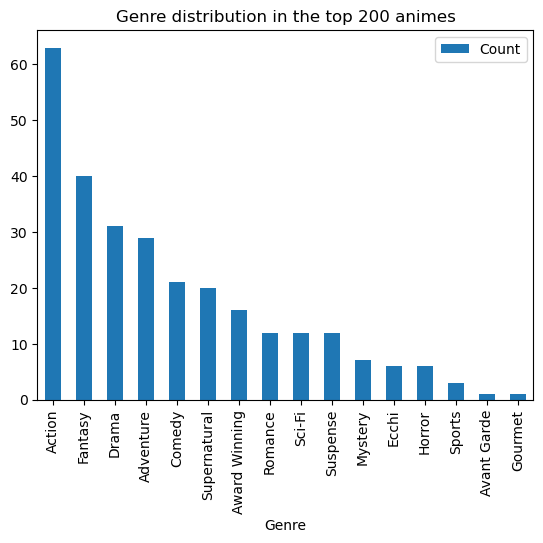

In [29]:
top_animes = anime_clean_rank.head(100).loc[:,'Name'].tolist()
top_animes
df_top_animes = df_anime_only[df_anime_only['Name'].isin(top_animes)].drop('Count', axis=1)
df_top_animes_genre = df_top_animes.groupby('Genre').size().reset_index(name='Count').sort_values('Count', ascending = False)
df_top_animes_genre.plot(kind = 'bar', x = 'Genre', y = 'Count', title= 'Genre distribution in the top 200 animes')

Teniendo en cuenta el gráfico vemos como tienen cierta similitud en acción, fantasía, drama y aventuras. Pero tienen una diferencia considerable en cuanto a Comedia. Lo que pone de manifiesto que el top 200 no se centra tanto en la comedia como todo el conjunto de datos de anime.

In [30]:
df_anime = anime_clean_rank

In [31]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [32]:
df_user.duplicated().sum()

0

In [33]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20031107 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 917.0+ MB


In [34]:
df_score.isnull().sum()

user_id          0
Username       180
anime_id         0
Anime Title      0
rating           0
dtype: int64

In [35]:
df_score.duplicated().sum()

0

# ***Visualization***

 ***AnimeDataset***

In [36]:
# Convert the 'Aired' column to string type
df_anime['Aired'] = df_anime['Aired'].astype(str)

# Extract the release year from the 'Aired' column
df_anime['Release_Year'] = df_anime['Aired'].str.extract(r'(\d{4})')

# Group by release year and count the number of anime for each year
anime_cby = df_anime.groupby('Release_Year').size().reset_index(name='Anime_Count')

# Sort the result by anime count in descending order
k = anime_cby.sort_values(by='Anime_Count', ascending=False)

# Display the top 10 years with the highest number of anime
k.head(10)

,Release_Year,Anime_Count
36,2016,324
37,2017,314
38,2018,302
35,2015,286
34,2014,279
39,2019,260
41,2021,254
33,2013,253
32,2012,232
42,2022,231


**Número de animes lanzados por años**

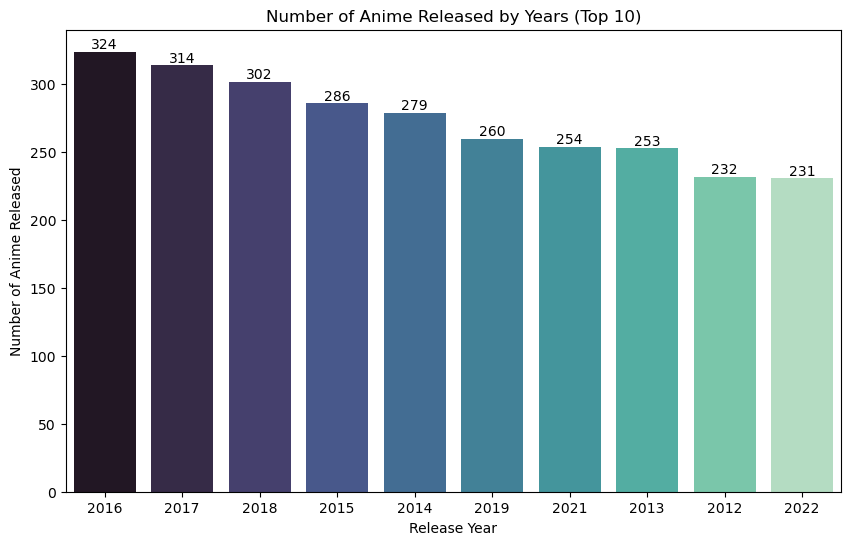

In [37]:
top_10 = k.head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Release_Year', y='Anime_Count', hue='Release_Year', data=top_10, palette='mako')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Anime Released')
plt.title('Number of Anime Released by Years (Top 10)')
plt.show()

**Los 10 animes mejor valorados hasta 2023**

In [38]:
name_score=anime_clean_rank[['Name','Rank Number']].sort_values(by='Rank Number',ascending=True).head(10)
name_score.head(10)

,Name,Rank Number
0,Shingeki no Kyojin,1
1,Death Note,2
2,Fullmetal Alchemist: Brotherhood,3
3,One Punch Man,4
4,Kimetsu no Yaiba,5
5,Kimi no Na wa.,6
6,Boku no Hero Academia,7
7,Naruto,8
8,Shingeki no Kyojin Season 2,9
9,Hunter x Hunter (2011),10


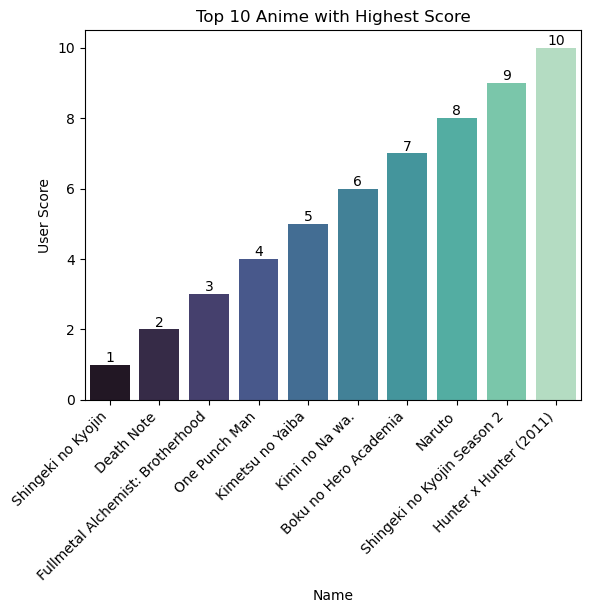

In [39]:
ax=sns.barplot(y='Rank Number',x='Name',hue='Name',data=name_score,palette='mako')
ax.set_title('Top 10 Anime with Highest Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=45, ha='right')
ax.title.set_text('Top 10 Anime with Highest Score')
plt.show()

**Los 10 animes mejor valorados hasta 2023**

In [40]:
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=False).head(10)
name_score.head(10)

,Name,Score
2,Fullmetal Alchemist: Brotherhood,9.1
18,Steins;Gate,9.07
414,Bleach: Sennen Kessen-hen,9.07
362,Gintama°,9.06
14,Shingeki no Kyojin Season 3 Part 2,9.05
163,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05
390,Gintama',9.04
9,Hunter x Hunter (2011),9.04
1161,Gintama: The Final,9.04
554,Gintama': Enchousen,9.03


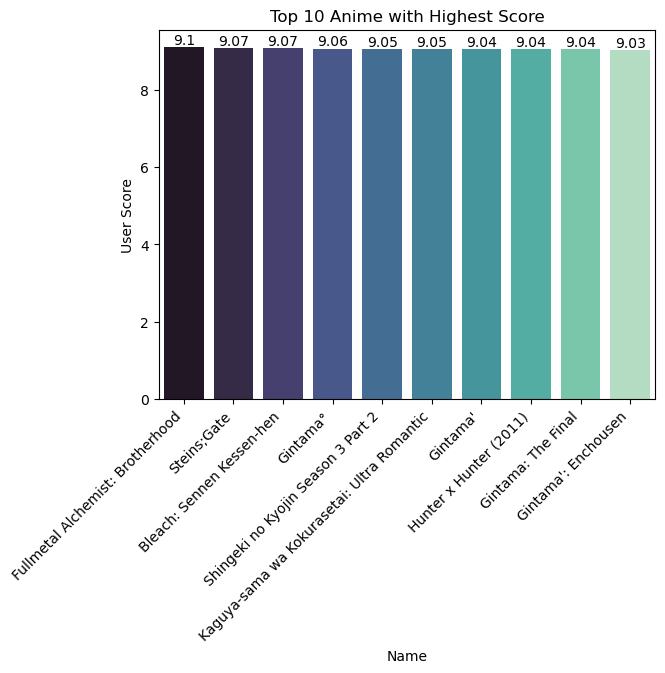

In [41]:
ax=sns.barplot(y='Score',x='Name',hue='Name',data=name_score,palette='mako')
ax.set_title('Top 10 Anime with Highest Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=45, ha='right')
ax.title.set_text('Top 10 Anime with Highest Score')
plt.show()

**Los 10 animes con peores calificaciones hasta 2023**

In [42]:
sns.set_style('whitegrid')
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=True)
name_score.head(10)

,Name,Score
5216,Aki no Puzzle,2.37
2452,Ex-Arm,2.9
5610,Madonna (Movie),2.91
5781,Super Child,2.91
4520,Mochibei,2.99
5149,Fetish Doll,3.05
5273,Ladyspo,3.06
5345,Scrap Diary,3.14
5438,Koumon-teki Juuku Ketsujiru Juke,3.26
3586,Vampire Holmes,3.28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


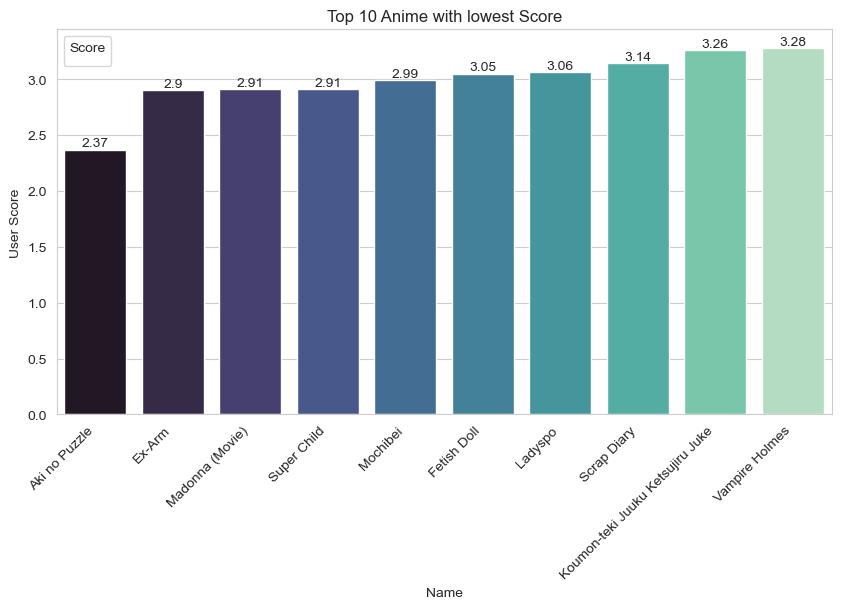

In [43]:
sns.set_style('whitegrid')
name_score=anime_clean_rank[['Name','Score']].sort_values(by='Score',ascending=True).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(y='Score',x='Name',hue='Name',data=name_score,palette='mako')
ax.set_title('Top 10 Anime with lowest  Score')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Name')
ax.set_ylabel('User Score')
plt.xticks(rotation=90)
ax.title.set_text('Top 10 Anime with lowest Score')
plt.legend(title='Score' ,loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

**Los 10 animes más famosos hasta 2023 (según la lista agregada por los usuarios)**

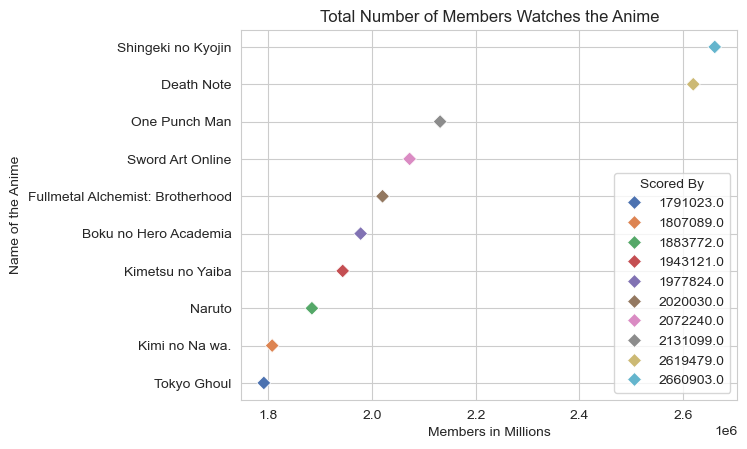

In [44]:
famous=anime_clean_rank[['Scored By','Name']].sort_values(by='Scored By',ascending=False).head(10)
ax=sns.scatterplot(x='Scored By',y='Name',s=50,data=famous,marker='D',palette='deep',hue='Scored By')
plt.xlabel('Members in Millions')
plt.ylabel('Name of the Anime')
plt.title('Total Number of Members Watches the Anime')
plt.show()

**Recuento de nombres de anime por tipo**

In [45]:
Type_Counts = df_anime['Type'].value_counts()
Type_Counts.head(10)

Type
TV       4255
Movie    2059
Name: count, dtype: int64

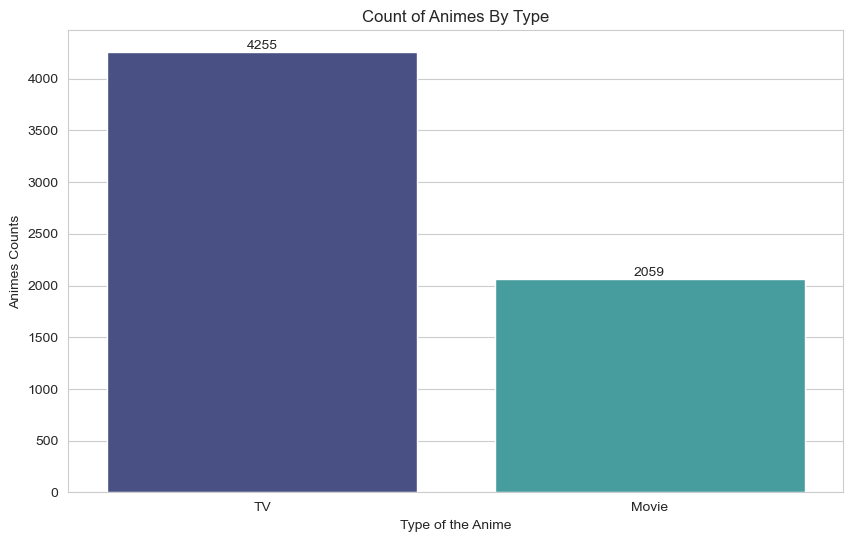

In [46]:
# Count the number of anime titles by type
Type_Counts = df_anime['Type'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=Type_Counts.index, y=Type_Counts.values, hue=Type_Counts.index, palette='mako')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Type of the Anime')
ax.set_ylabel('Animes Counts')
plt.title('Count of Animes By Type')
plt.show()

**Los 15 mejores animes según su comunidad**

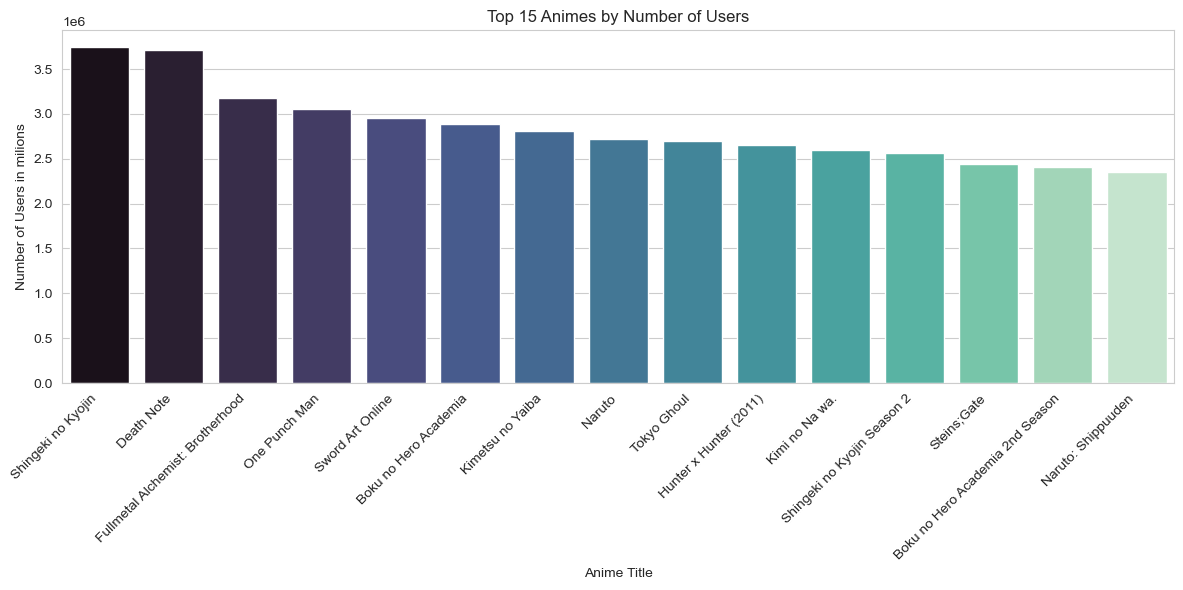

In [47]:
top_15_scored = df_anime.sort_values(by='Members', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_scored, x='Name', y='Members',hue='Name', palette='mako')
plt.xlabel('Anime Title')
plt.ylabel('Number of Users in milions')
plt.title('Top 15 Animes by Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Recuento de animes por género**

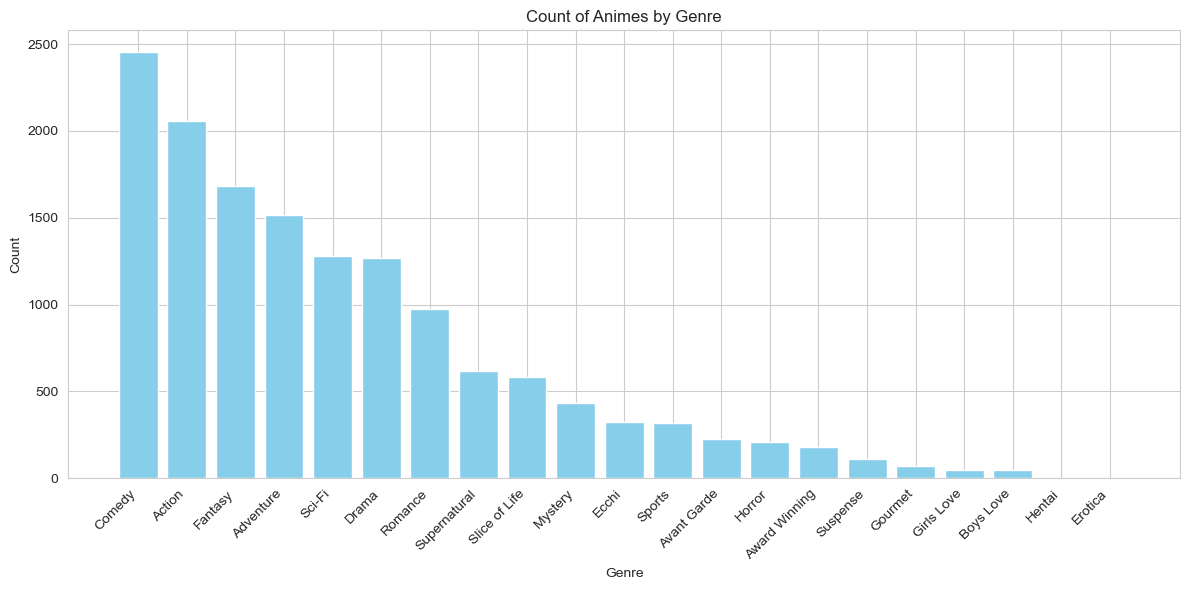

In [48]:
# Split the genres and count their occurrences
Genre_Counts = df_anime[df_anime['Genres'] != "UNKNOWN"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 6))
plt.bar(Genre_Counts.index, Genre_Counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Animes by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Los 15 géneros más populares en la industria del anime**

**Distribución de géneros de anime**

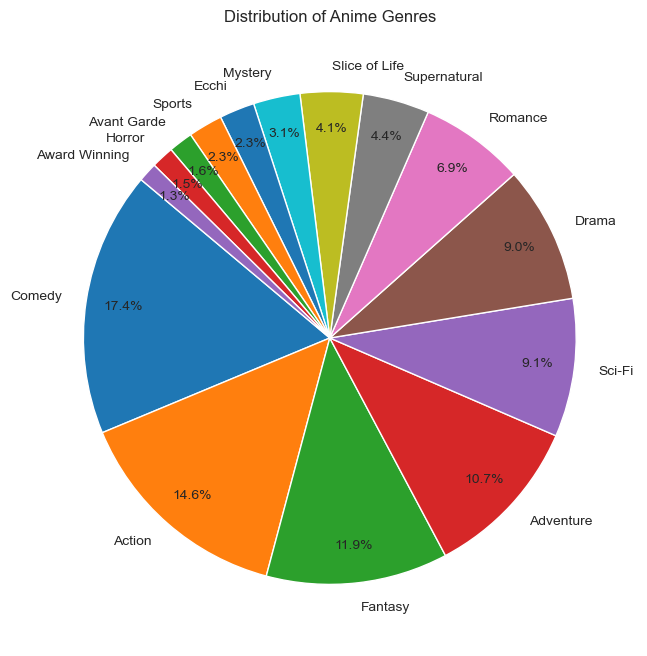

In [49]:
top_15_genres = Genre_Counts.head(15)
plt.figure(figsize=(8, 8))
plt.pie(top_15_genres.values, labels=top_15_genres.index, autopct='%1.1f%%', startangle=140,pctdistance=0.85)
plt.title('Distribution of Anime Genres')
plt.show()

**Los 10 principales licenciantes de anime**

In [50]:
df_anime['Licensors'].value_counts()

Licensors
UNKNOWN                                                  3356
Funimation                                                717
Sentai Filmworks                                          592
Aniplex of America                                        175
Discotek Media                                            165
                                                         ... 
Funimation, NBCUniversal Entertainment Japan                1
Funimation, Discotek Media, Geneon Entertainment USA        1
Bandai Entertainment, Aniplex of America                    1
Sony Pictures Entertainment, Mill Creek Entertainment       1
Arts Magic                                                  1
Name: count, Length: 208, dtype: int64

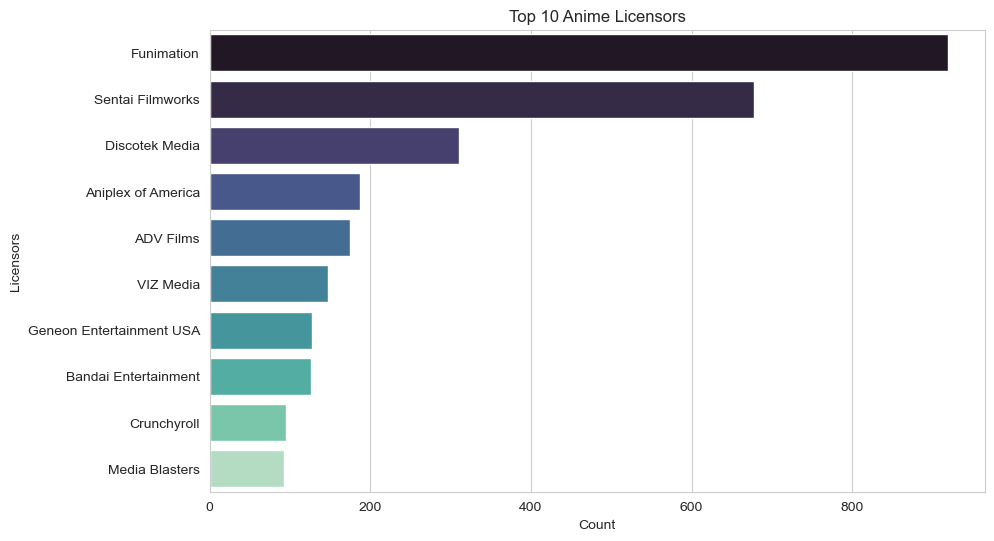

In [51]:
# Create a list of all the individual licensors
licensors_list = [licensor.strip() for licensors in df_anime[df_anime['Licensors']!="UNKNOWN"]['Licensors'].str.split(',') for licensor in licensors]

# Count the occurrences of each licensor
licensor_counts = pd.Series(licensors_list).value_counts()

# Filter the licensor_counts series to exclude 'Unknown'
filtered_licensor_counts = licensor_counts[licensor_counts.index != 'Unknown']

# Select the top 10 licensors
top_10_licensors = filtered_licensor_counts.head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_licensors.values, y=top_10_licensors.index, palette='mako')
plt.title('Top 10 Anime Licensors')
plt.xlabel('Count')
plt.ylabel('Licensors')
plt.show()


**Distribution Premiered Season**

In [52]:
df_anime['Premiered'].value_counts()

Premiered
UNKNOWN        2090
fall 2016        69
spring 2018      68
spring 2017      64
spring 2006      63
               ... 
summer 1992       2
summer 1991       1
summer 1981       1
winter 1985       1
summer 1986       1
Name: count, Length: 174, dtype: int64

In [53]:
# Function to extract the season and year from the premiered string
def extract_season_year(premiered):
    if premiered == 'UNKNOWN':
        return None, None
    else:
        season, year = premiered.split()
        return season, int(year)

# Apply the function to extract the season and year from the "Premiered" column
season_year = df_anime['Premiered'].map(extract_season_year)
premiered_season = season_year.apply(lambda x: x[0])
premiered_Year = season_year.apply(lambda x: x[1])

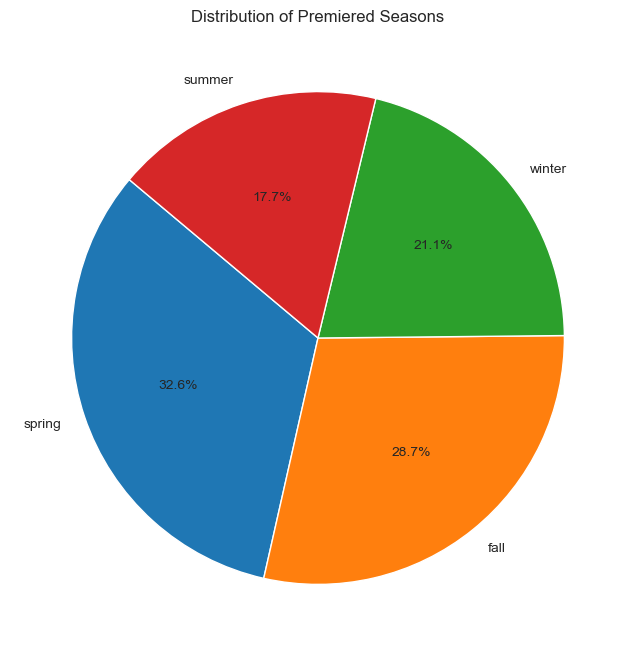

In [54]:
# Filter out None values from premiered_season
filtered_premiered_season = premiered_season.dropna()

# Count the occurrences of each season
season_counts = filtered_premiered_season.value_counts()

# Create the pie plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Distribution of Premiered Seasons')
plt.show()

**Los 10 estudios con mayor número de animes estrenados**

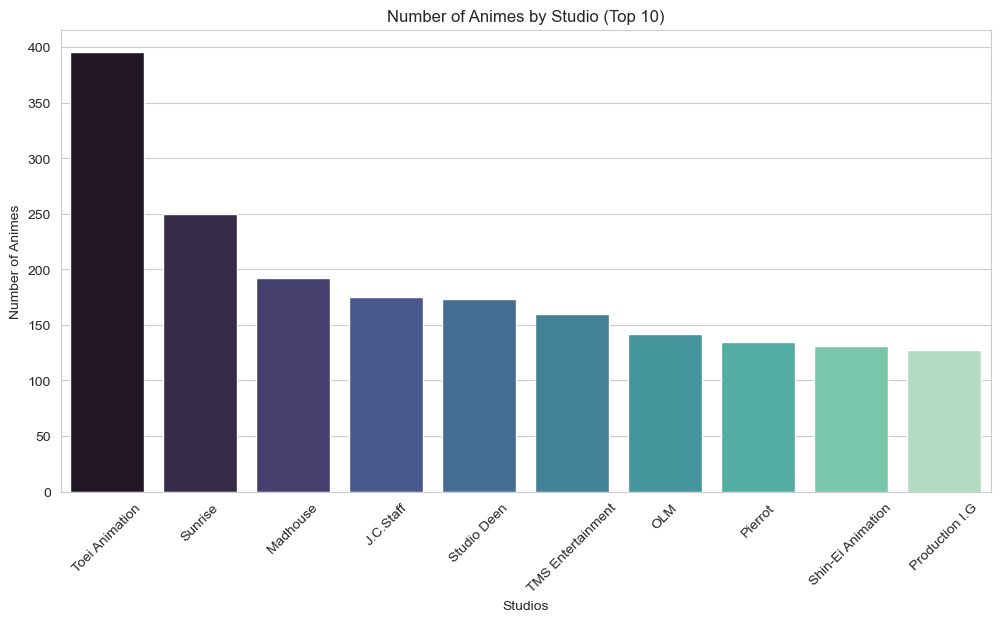

In [55]:
# Count the occurrences of each studio
studio_counts = df_anime['Studios'].value_counts()

# Filter the studio_counts series to exclude 'Unknown'
studio_counts = studio_counts[studio_counts.index != 'UNKNOWN']

# Select the top 10 studios with the highest number of animes
top_studios = studio_counts.head(10)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios.index, y=top_studios.values, hue=top_studios.index, palette='mako')
plt.title('Number of Animes by Studio (Top 10)')
plt.xlabel('Studios')
plt.ylabel('Number of Animes')
plt.xticks(rotation=45)
plt.show()

**Recuento de animes según su idioma nativo**

In [56]:
# Function to map abbreviated language codes to full names
def map_language_code(code):
    language_mapping = {
        'ja': 'Japanese',
        'ko': 'Korean',
        'zh-cn': 'Simplified Chinese',
        'de': 'German',
        'vi': 'Vietnamese',
        'en': 'English',
        'zh-tw': 'Traditional Chinese'
    }
    return language_mapping.get(code, 'Other')

# Function to detect language
def detect_language(name):
    try:
        return detect(name)
    except:
        return None  # Return None for rows where detection fails

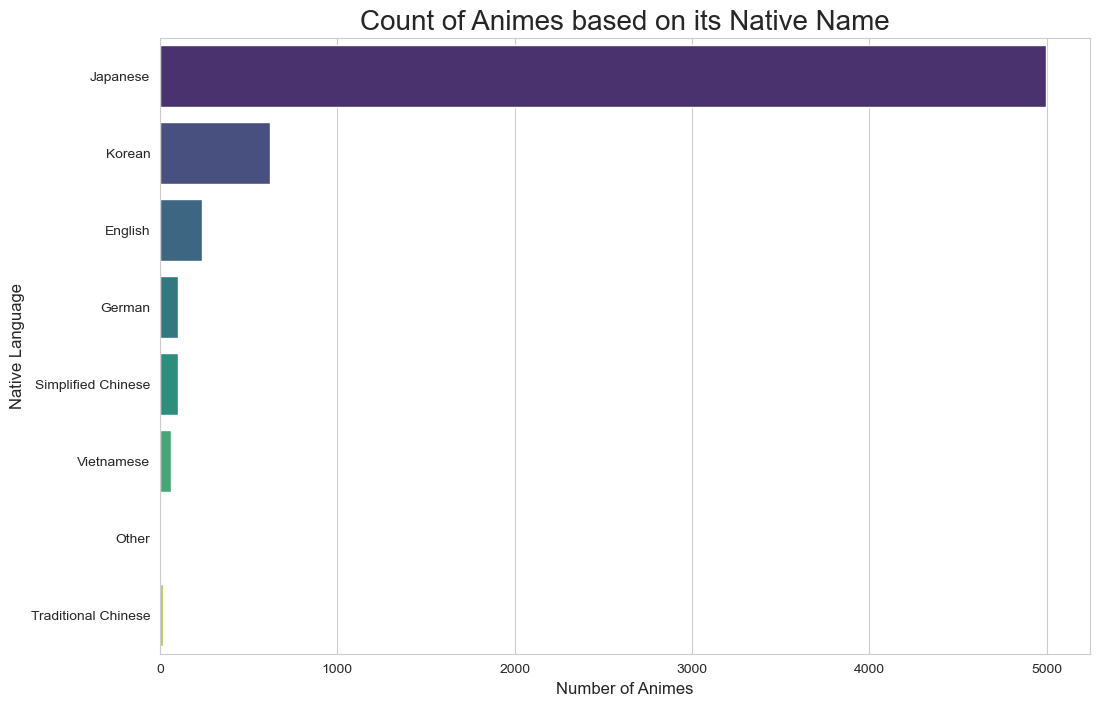

In [57]:
# Apply language detection to the 'Other name' column
Detected_Language = df_anime[df_anime['Other name'] != "UNKNOWN"]['Other name'].apply(detect_language)

# Drop rows where language detection failed (i.e., where Detected_Language is None)
Detected_Language = Detected_Language.dropna()

# Count the occurrences of each language
language_counts = Detected_Language.value_counts()

# Map abbreviated language codes to full names for plotting
language_counts.index = language_counts.index.map(map_language_code)

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot horizontal bar chart
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')

# Set the title and axis labels
plt.title('Count of Animes based on its Native Name', fontsize=20)
plt.xlabel('Number of Animes', fontsize=12)
plt.ylabel('Native Language', fontsize=12)
plt.show()

**User DataSet**

**Distribución por género**

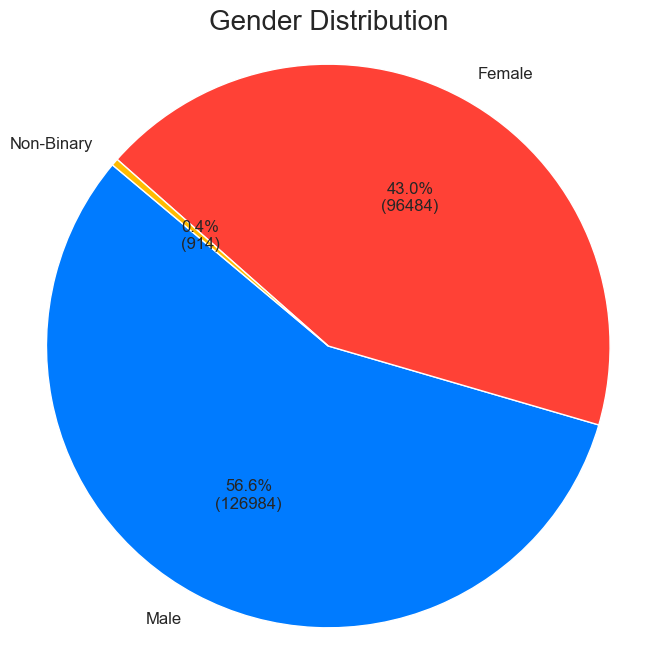

In [58]:
# Count the occurrences of each gender
gender_counts = df_user['Gender'].value_counts(dropna=True)

# Define custom colors for the pie slices
colors = ['#007BFF', '#FF4136', '#FFBB00', '#7D7D7D']

# Calculate percentages
total_count = gender_counts.sum()
percentages = [(count / total_count) * 100 for count in gender_counts]

# Create the pie plot
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors, autopct=lambda p: f'{p:.1f}%\n({int(p * total_count / 100)})', startangle=140, textprops={'fontsize': 12})
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

**Observación del comportamiento de midnightq2**

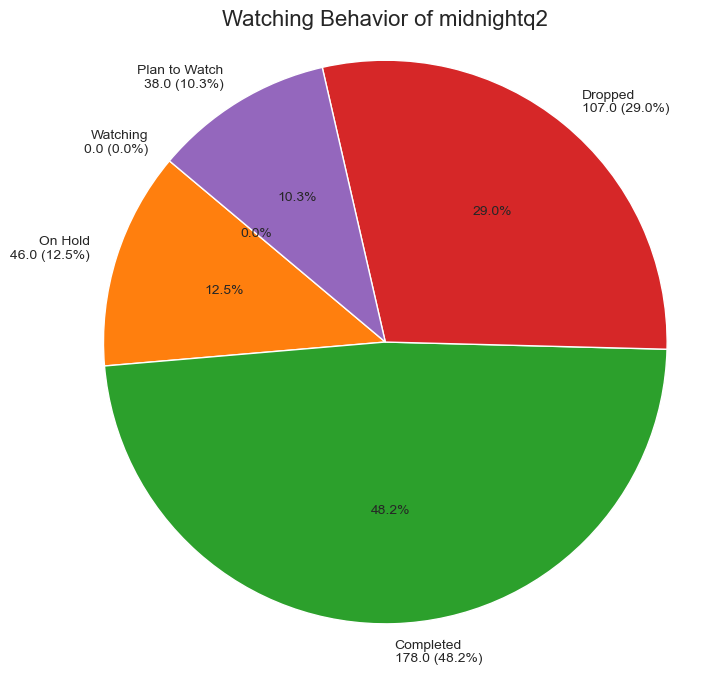

In [59]:
# Function to get watching behavior of a specific user
def get_watching_behavior(username):
    user_data = df_user[df_user['Username'] == username]
    if len(user_data) == 0:
        return None
    watching = user_data['Watching'].values[0]
    on_hold = user_data['On Hold'].values[0]
    completed = user_data['Completed'].values[0]
    dropped = user_data['Dropped'].values[0]
    plan_to_watch = user_data['Plan to Watch'].values[0]
    return watching, on_hold, completed, dropped, plan_to_watch

# Get the input username from the user
username_input = "midnightq2"  # input("Enter the username: ")

# Get the watching behavior of the user
watching, on_hold, completed, dropped, plan_to_watch = get_watching_behavior(username_input)

# Create data for the pie chart
labels = ['Watching', 'On Hold', 'Completed', 'Dropped', 'Plan to Watch']
sizes = [watching, on_hold, completed, dropped, plan_to_watch]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Calculate percentages
total_count = sum(sizes)
percentages = [(size / total_count) * 100 for size in sizes]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=[f'{label}\n{size} ({percentage:.1f}%)' for label, size, percentage in zip(labels, sizes, percentages)],
        colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"Watching Behavior of {username_input}", fontsize=16)

# Show the plot
plt.axis('equal')
plt.show()


**Top 10 Animes Watched By Most Users**

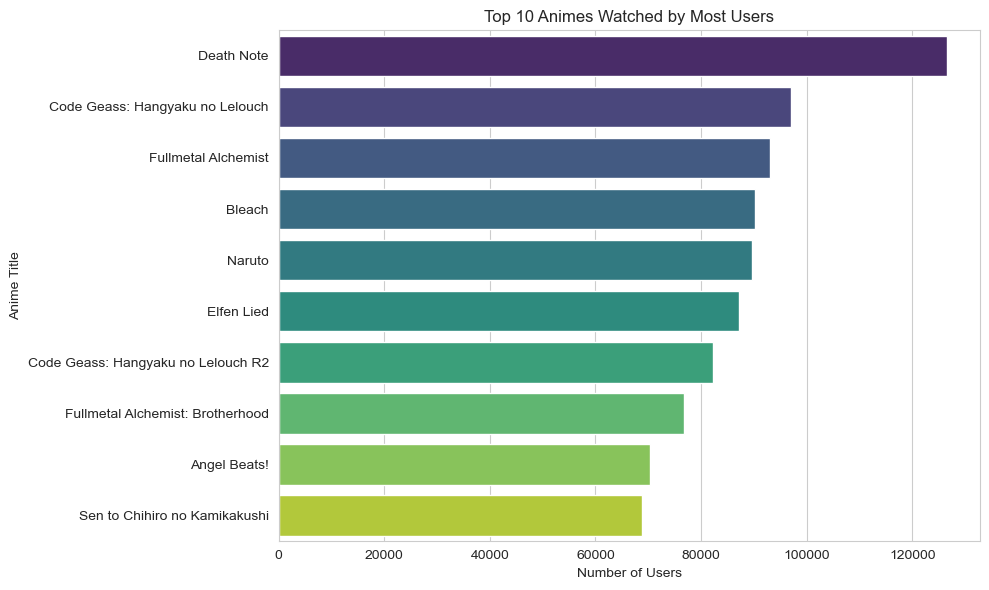

In [60]:
# Get the count of users who watched each anime title
anime_watch_count = df_score.groupby('Anime Title')['user_id'].nunique().reset_index()
anime_watch_count = anime_watch_count.rename(columns={'user_id': 'User Count'})

# Sort the dataframe in descending order by the number of users
anime_watch_count = anime_watch_count.sort_values(by='User Count', ascending=False)

# Select the top 10 anime titles with the highest number of users
top_n = 10
top_anime_watch_count = anime_watch_count.head(top_n)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_anime_watch_count, x='User Count', y='Anime Title', hue='Anime Title', palette='viridis')
plt.title(f'Top {top_n} Animes Watched by Most Users')
plt.xlabel('Number of Users')
plt.ylabel('Anime Title')

# Show the plot
plt.tight_layout()
plt.show()

# ***Collaborative Filtering***

In [61]:
print("Shape of the Dataset:",df_score.shape)
df_score.head()

Shape of the Dataset: (20031107, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
4,1,Xinil,304,Aa! Megami-sama! Movie,8
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8
6,1,Xinil,53,Ai Yori Aoshi,7


In [62]:
# Checking if there are any duplicate rows
duplicated_rows = df_score[df_score.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [user_id, Username, anime_id, Anime Title, rating]
Index: []


In [63]:
# Calculating the average score
avg_score = np.mean(df_score['rating'])
print('Average Score:', avg_score)

Average Score: 7.705657305909254


In [64]:
g = df_score.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = df_score.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = df_score.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,1,20,30,121,199,226,269,431,849,853,1535,1575,1735,2025,2167,2904,5114,6547,6746,8074
user_id,,,,,,,,,,,,,,,,,,,,
2276,9.0,NaN,5.0,8.0,9.0,8.0,6.0,8.0,8.0,8.0,7.0,8.0,NaN,8.0,7.0,8.0,NaN,7.0,9.0,6.0
6140,9.0,7.0,10.0,8.0,7.0,9.0,8.0,8.0,10.0,7.0,9.0,8.0,8.0,7.0,9.0,9.0,9.0,8.0,8.0,8.0
17481,9.0,7.0,9.0,8.0,9.0,8.0,7.0,10.0,8.0,8.0,9.0,8.0,6.0,7.0,8.0,8.0,8.0,7.0,8.0,7.0
33547,9.0,7.0,6.0,6.0,6.0,2.0,4.0,7.0,9.0,6.0,7.0,6.0,4.0,7.0,3.0,4.0,9.0,2.0,6.0,3.0
50470,6.0,8.0,8.0,7.0,8.0,8.0,7.0,8.0,8.0,6.0,7.0,7.0,7.0,6.0,9.0,6.0,NaN,8.0,6.0,6.0
106788,8.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,8.0,9.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0
111604,10.0,5.0,10.0,9.0,10.0,4.0,6.0,7.0,7.0,7.0,6.0,2.0,NaN,6.0,6.0,NaN,5.0,9.0,6.0,8.0
114861,7.0,5.0,9.0,6.0,4.0,5.0,5.0,4.0,6.0,6.0,5.0,10.0,NaN,7.0,8.0,10.0,6.0,8.0,7.0,6.0
292624,7.0,2.0,8.0,5.0,7.0,NaN,3.0,5.0,7.0,9.0,6.0,7.0,2.0,7.0,NaN,6.0,8.0,3.0,6.0,4.0


In [65]:
# Escalar nuestra columna de "calificación"
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Escala la columna 'puntuación' entre 0 y 1
df_score['scaled_score'] = scaler.fit_transform(df_score[['rating']])

In [66]:
# Encoding categorical data

## Encoding user IDs
user_encoder = LabelEncoder()
df_score["user_encoded"] = user_encoder.fit_transform(df_score["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
df_score["anime_encoded"] = anime_encoder.fit_transform(df_score["anime_id"])
num_animes = len(anime_encoder.classes_)

# Printing dataset information
print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df_score['rating']), max(df_score['rating'])))

Number of unique users: 267184, Number of unique anime: 6822
Minimum rating: 1, Maximum rating: 10


In [67]:
df_score

,user_id,Username,anime_id,Anime Title,rating,scaled_score,user_encoded,anime_encoded
0,1,Xinil,21,One Piece,9,0.888889,0,11
1,1,Xinil,48,.hack//Sign,7,0.666667,0,28
4,1,Xinil,304,Aa! Megami-sama! Movie,8,0.777778,0,233
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8,0.777778,0,234
6,1,Xinil,53,Ai Yori Aoshi,7,0.666667,0,31
...,...,...,...,...,...,...,...,...
24325186,1291087,Oblongata,10611,R-15,3,0.222222,267182,3209
24325187,1291087,Oblongata,174,Tenjou Tenge,6,0.555556,267182,135
24325188,1291097,JuunanaSai,1535,Death Note,9,0.888889,267183,897
24325189,1291097,JuunanaSai,226,Elfen Lied,10,1.000000,267183,168


In [68]:
# Shuffle the dataset
df_score = shuffle(df_score, random_state=100)

# Create feature matrix X and target variable y
X = df_score[['user_encoded', 'anime_encoded']].values
y = df_score["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20031107, 2)
Shape of y: (20031107,)


In [69]:
test_set_size = 5000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))


Number of samples in the training set: 20026107
Number of samples in the test set: 5000


In [70]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [71]:
import tensorflow as tf

# Setting TPU_INIT flag
USE_TPU = False

# Checking if TPU is initialized
if USE_TPU:
    try:
        # Initialize TPU
        tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu_resolver)
        tf.tpu.experimental.initialize_tpu_system(tpu_resolver)
        tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu_resolver)
        print('TPU initialized')
    except ValueError as e:
        print(f"Failed to initialize TPU: {e}")
else:
    # For GPU check
    !nvidia-smi

# Print the TensorFlow version
tf_version = tf.__version__
print(f"TensorFlow version: {tf_version}")


zsh:1: command not found: nvidia-smi
TensorFlow version: 2.16.2


In [72]:
def RecommenderNet(num_users, num_animes, embedding_size=128):
    # User input layer and embedding layer
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size)(user)

    # Anime input layer and embedding layer
    anime = Input(name='anime_encoded', shape=[1])
    anime_embedding = Embedding(name='anime_embedding', input_dim=num_animes, output_dim=embedding_size)(anime)

    # Dot product of user and anime embeddings
    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)

    # Dense layers for prediction
    dense = Dense(64, activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)
    # Create and compile the model
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["mae", "mse"])

    return model
# Checking if TPU is initialized and create the model accordingly
if USE_TPU:
    with tpu_strategy.scope():
        model = RecommenderNet(num_users, num_animes)
else:
    model = RecommenderNet(num_users, num_animes)
# Printing my model summary
model.summary()

2025-03-01 17:31:35.377387: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-03-01 17:31:35.377438: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-01 17:31:35.377455: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-01 17:31:35.377494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-01 17:31:35.377507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_encoded        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_encoded       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │ 34,199,552 │ user_encoded[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_embedding     │ (None, 1, 128)    │    873,216 │ anime_encoded[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1, 1)      │          0 │ user_embedding[0… │
│                     │                   │            │ anime_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1)         │          0 │ dot_product[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        128 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 35,072,961 (133.79 MB)

 Trainable params: 35,072,961 (133.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.001
min_lr = 0.001
max_lr = 0.005
batch_size = 10000

# Adjust the maximum learning rate and batch size if using TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = 'data/myanimeweights.weights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]

In [74]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20


2025-03-01 17:31:37.500434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2003/2003 ━━━━━━━━━━━━━━━━━━━━ 278s 136ms/step - loss: 0.5643 - mae: 0.1399 - mse: 0.0325 - val_loss: 0.5293 - val_mae: 0.1003 - val_mse: 0.0177 - learning_rate: 0.0010
Epoch 2/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 267s 133ms/step - loss: 0.5393 - mae: 0.1142 - mse: 0.0229 - val_loss: 0.5636 - val_mae: 0.1352 - val_mse: 0.0304 - learning_rate: 0.0018
Epoch 3/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 275s 137ms/step - loss: 0.5640 - mae: 0.1387 - mse: 0.0317 - val_loss: 0.5639 - val_mae: 0.1355 - val_mse: 0.0306 - learning_rate: 0.0026
Epoch 4/20
2003/2003 ━━━━━━━━━━━━━━━━━━━━ 278s 138ms/step - loss: 0.5641 - mae: 0.1389 - mse: 0.0318 - val_loss: 0.5639 - val_mae: 0.1356 - val_mse: 0.0306 - learning_rate: 0.0034


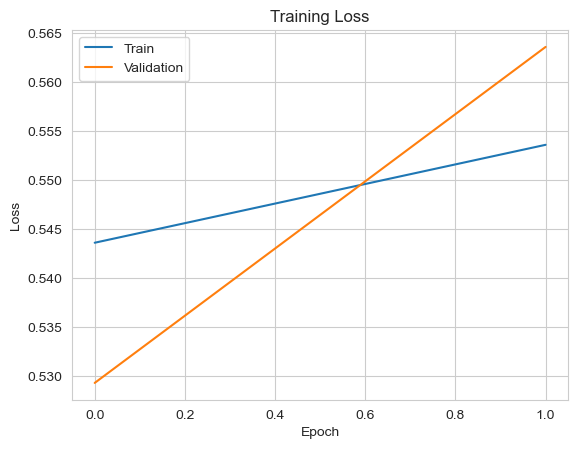

In [75]:
# Visualización de resultados de entrenamiento
plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [76]:
df_score

,user_id,Username,anime_id,Anime Title,rating,scaled_score,user_encoded,anime_encoded
9956616,342222,Sillfon,4063,Sekirei,7,0.666667,104589,1953
1180438,15338,Lajto-kun,7647,Arakawa Under the Bridge,6,0.555556,9928,2710
10229632,347805,Tony-kun,3087,Cencoroll,7,0.666667,107938,1636
12173629,388159,SynapticRelay,8676,Amagami SS,7,0.666667,130899,2887
3186978,44046,Elear,1279,Taiyou no Ko Esteban,10,1.000000,28669,798
...,...,...,...,...,...,...,...,...
906591,11074,rettev,934,Higurashi no Naku Koro ni,8,0.777778,7211,621
5500561,86436,JB-2,71,Full Metal Panic!,8,0.777778,53120,48
15513204,466706,SlayersZ,393,Escaflowne,4,0.333333,168306,297
13948739,428819,zatchi,143,Kannazuki no Miko,7,0.666667,151078,106


In [77]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = model.get_layer(name)

    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]

    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))

    return weights

# Extract weights for anime embeddings
anime_weights = extract_weights('anime_embedding', model)
# Extract weights for user embeddings
user_weights = extract_weights('user_embedding', model)

In [78]:
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        anime_row = df_anime[df_anime['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]
        weights = anime_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('Animes closest to {}'.format(name))
        if return_dist:
            return dists, closest

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoder.inverse_transform([close])[0]
            anime_frame = df_anime[df_anime['anime_id'] == decoded_id]

            anime_name = anime_frame['Name'].values[0]
            english_name = anime_frame['English name'].values[0]
            name = english_name if english_name != "UNKNOWN" else anime_name
            genre = anime_frame['Genres'].values[0]
            Synopsis = anime_frame['Synopsis'].values[0]
            similarity = dists[close]
            similarity = "{:.2f}%".format(similarity * 100)
            SimilarityArr.append({"Name": name, "Similarity": similarity, "Genres": genre, "Synopsis":Synopsis})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame[Frame.Name != name]
    except:
        print('{} not found in Anime list'.format(name))

pd.set_option('display.max_colwidth', None)

In [79]:
find_similar_animes('Kimetsu no Yaiba', n=25, neg=False)

Animes closest to Kimetsu no Yaiba


,Name,Similarity,Genres,Synopsis
24,Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train,91.32%,"Action, Fantasy","After a string of mysterious disappearances begin to plague a train, the Demon Slayer Corps' multiple attempts to remedy the problem prove fruitless. To prevent further casualties, the Flame Pillar, Kyoujurou Rengoku, takes it upon himself to eliminate the threat. Accompanying him are some of the Corps' most promising new blood: Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira, who all hope to witness the fiery feats of this model demon slayer firsthand.\n\nUnbeknownst to them, the demonic forces responsible for the disappearances have already put their sinister plan in motion. Under this demonic presence, the group must muster every ounce of their willpower and draw their swords to save all two hundred passengers onboard. Kimetsu no Yaiba Movie: Mugen Ressha-hen delves into the deepest corners of Tanjirou's mind, putting his resolve and commitment to duty to the test."
23,Demon Slayer: Kimetsu no Yaiba Entertainment District Arc,91.16%,"Action, Fantasy","The devastation of the Mugen Train incident still weighs heavily on the members of the Demon Slayer Corps. Despite being given time to recover, life must go on, as the wicked never sleep: a vicious demon is terrorizing the alluring women of the Yoshiwara Entertainment District. The Sound Pillar, Tengen Uzui, and his three wives are on the case. However, when he soon loses contact with his spouses, Tengen fears the worst and enlists the help of Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira to infiltrate the district's most prominent houses and locate the depraved Upper Rank demon."
22,My Hero Academia Season 3,86.68%,Action,"As summer arrives for the students at UA Academy, each of these superheroes-in-training puts in their best efforts to become renowned heroes. They head off to a forest training camp run by UA's pro heroes, where the students face one another in battle and go through dangerous tests, improving their abilities and pushing past their limits. However, their school trip is suddenly turned upside down when the League of Villains arrives, invading the camp with a mission to capture one of the students. \n\nBoku no Hero Academia 3rd Season follows Izuku ""Deku"" Midoriya, an ambitious student training to achieve his dream of becoming a hero similar to his role model—All Might. Being one of the students caught up amidst the chaos of the villain attack, Deku must take a stand with his classmates and fight for their survival."
21,Demon Slayer: Kimetsu no Yaiba Mugen Train Arc,86.50%,"Action, Fantasy","A mysterious string of disappearances on a certain train has caught the attention of the Demon Slayer Corps, and they have sent one of their best to exterminate what can only be a demon responsible. However, the plan to board the Mugen Train is delayed by a lesser demon who is terrorizing the mechanics and targeting a kind, elderly woman and her granddaughter. Kyoujurou Rengoku, the Flame Pillar, must eliminate the threat before boarding the train.\n\nSent to assist the Pillar, Tanjirou Kamado, Inosuke Hashibira, and Zenitsu Agatsuma enter the train prepared to fight. But their monstrous target already has a devious plan in store for them and the two hundred passengers: by delving deep into their consciousness, the demon intends to obliterate everyone in a stunning display of the power held by the Twelve Demon Moons."
20,My Hero Academia Season 2,85.69%,Action,"At UA Academy, not even a violent attack can disrupt their most prestigious event: the school sports festival. Renowned across Japan, this festival is an opportunity for aspiring heroes to showcase their abilities, both to the public and potential recruiters.\n\nHowever, the path to glory is never easy, especially for Izuku Midoriya—whose quirk possesses great raw power but is also cripplingly inefficient. Pitted against his talented classmates, such as the fire and ice wielding

In [80]:
find_similar_animes('Akira', n=3, neg=False)

Animes closest to Akira


,Name,Similarity,Genres,Synopsis
2,Ghost in the Shell,87.14%,"Action, Award Winning, Mystery, Sci-Fi, Suspense","In the year 2029, Niihama City has become a technologically advanced metropolis. Due to great improvements in cybernetics, its citizens are able to replace their limbs with robotic parts. The world is now more interconnected than ever before, and the city's Public Security Section 9 is responsible for combating corruption, terrorism, and other dangerous threats following this shift toward globalization.\n\nThe strong-willed Major Motoko Kusanagi of Section 9 spearheads a case involving a mysterious hacker known only as the ""Puppet Master,"" who leaves a trail of victims stripped of their memories. Like many in this futuristic world, the Puppet Master's body is almost entirely robotic, giving them incredible power.\n\nAs Motoko and her subordinates follow the enigmatic criminal's trail, other parties—including Section 6—start to get involved, forcing her to confront the extremely complicated nature of the case. Pondering about various philosophical questions, such as her own life's meaning, Motoko soon realizes that the one who will provide these answers is none other than the Puppet Master themself."
1,Ghost in the Shell 2: Innocence,72.94%,"Award Winning, Sci-Fi","With Major Motoko Kusanagi missing, Section 9's Batou is assigned to investigate a string of gruesome murders—seemingly at the hands of faulty gynoids, or sex robots. But when a faulty gynoid leaves Batou a cryptic message, he begins to question the cause of their malfunctions. Suspicions of politically motivated murder and an illegal ""ghost"" quickly crop up, drawing Batou and his partner Togusa into a perilous web of conspiracy.\n\nAs their investigation goes on, the line between man and machine continues to blur, and reality and perception become indistinguishable. Confronting strange and dangerous foes, Batou and Togusa explore a futuristic world filled with machines and living dolls but utterly devoid of humanity."
0,Perfect Blue,71.46%,"Avant Garde, Drama, Horror","J-pop idol group CHAM! has spent the last two years entertaining its fans. Sadly, all good things must come to an end, and CHAM! must see one of its members, Mima Kirigoe, leave the group to pursue her acting career. While Mima's choice is met with a mixed response, she hopes her fans will continue to support her.\n\nHowever, Mima's life begins to change drastically after her departure from the group. Wanting to shed her pop-idol image, she takes on a role in a crime drama series, and her career as an actress gradually becomes more demanding and taxing for both Mima and her manager, Rumi Hidaka. To add to Mima's growing unease, an obsessed fan who is incapable of accepting that Mima has quit being an innocent idol, begins stalking her; a new anonymous website begins to impersonate her life with intricate detail; and CHAM! also appears to be doing better without her. One by one, each disturbing development drives Mima to become increasingly unhinged and unable to distinguish reality from fantasy."


In [81]:
find_similar_animes('Tensei shitara Slime Datta Ken', n=25, neg=False)

Animes closest to Tensei shitara Slime Datta Ken


,Name,Similarity,Genres,Synopsis
24,That Time I Got Reincarnated as a Slime Season 2,88.06%,"Action, Adventure, Comedy, Fantasy","Taking a break from his time as a teacher, the powerful slime Rimuru Tempest returns to his kingdom, eponymously named Tempest, just in time to begin negotiations with a nearby nation—the Kingdom of Eurazania. While the negotiations are anything but peaceful, they do end successfully, allowing Rimuru to return and finish teaching. When trying to again return to Tempest, this time permanently, Rimuru is stopped by a mysterious figure who is somehow able to constrain the many magical abilities he has at his disposal. \n\nIn Tempest, the situation is even worse. A group of unknown humans has invaded the land and are assaulting its citizens, both influential and innocent. They are not just trying to bring harm either—they have the intent to kill. Can Rimuru overcome his powerful and dangerous foe and return to Tempest before it is too late?"
23,That Time I Got Reincarnated as a Slime Season 2 Part 2,82.25%,"Action, Adventure, Comedy, Fantasy","The nation of Tempest is in a festive mood after successfully overcoming the surprise attack from the Falmuth Army and the Western Holy Church. Beyond the festivities lies a meeting between Tempest and its allies to decide the future of the Nation of Monsters. The aftermath of the Falmuth invasion, Milim Nava's suspicious behavior, and the disappearance of Demon Lord Carrion—the problems seem to keep on piling up.\n\nRimuru Tempest, now awakened as a ""True Demon Lord,"" decides to go on the offensive against Clayman. With the fully revived ""Storm Dragon"" Veldora, ""Ultimate Skill"" Raphael, and other powerful comrades, the ruler of the Tempest is confident in taking down his enemies one by one until he can face the man pulling the strings."
22,The Rising of the Shield Hero,81.27%,"Action, Adventure, Drama, Fantasy","The Four Cardinal Heroes are a group of ordinary men from modern-day Japan summoned to the kingdom of Melromarc to become its saviors. Melromarc is a country plagued by the Waves of Catastrophe that have repeatedly ravaged the land and brought disaster to its citizens for centuries. The four heroes are respectively bestowed a sword, spear, bow, and shield to vanquish these Waves. Naofumi Iwatani, an otaku, becomes cursed with the fate of being the ""Shield Hero."" Armed with only a measly shield, Naofumi is belittled and ridiculed by his fellow heroes and the kingdom's people due to his weak offensive capabilities and lackluster personality.\n\nWhen the heroes are provided with resources and comrades to train with, Naofumi sets out with the only person willing to train alongside him, Malty Melromarc. He is soon betrayed by her, however, and becomes falsely accused of taking advantage of her. Naofumi then becomes heavily discriminated against and hated by the people of Melromarc for something he didn't do. With a raging storm of hurt and mistrust in his heart, Naofumi begins his journey of strengthening himself and his reputation. Further along however, the difficulty of being on his own sets in, so Naofumi buys a demi-human slave on the verge of death named Raphtalia to accompany him on his travels.\n\nAs the Waves approach the kingdom, Naofumi and Raphtalia must fight for the survival of the kingdom and protect the people of Melromarc from their ill-fated future."
21,Dr. Stone,75.93%,"Adventure, Comedy, Sci-Fi","After five years of harboring unspoken feelings, high-schooler Taiju Ooki is finally ready to confess his love to Yuzuriha Ogawa. Just when Taiju begins his confession however, a blinding green light strikes the Earth and petrifies mankind around the world—turning every single human into stone.\n\nSeveral millennia later, Taiju awakens to find the modern world completely nonexistent, as nature has flourished in the years humanity stood still. Among a stone world of statues, Taiju encounters one other living human: his science-loving friend 

In [82]:
find_similar_animes('One Piece', n=25, neg=False)

Animes closest to One Piece


,Name,Similarity,Genres,Synopsis
24,One Piece Film: Strong World,80.06%,"Action, Adventure, Fantasy","Upon hearing news that islands in East Blue are being destroyed, Monkey D. Luffy and his crew go to investigate. On their way, however, an outlandish pirate ship appears out of the sky, helmed by the infamous pirate Shiki ""the Golden Lion""—a man who ate the Float-Float Fruit and the first ever prisoner to escape from Impel Down. In his quest to defeat the World Government, Shiki kidnaps Nami to be his own navigator and sends the rest of the Straw Hat Pirates to his floating islands as hostages, leaving her in a dilemma. Separated in a land under Shiki's absolute control, Luffy and his crew must survive the mystifying terrain in order to bring back their navigator and friend."
23,Fighting Spirit: New Challenger,78.94%,Sports,"Japanese Featherweight Champion Ippo Makunouchi has successfully defended and retained his title. Meanwhile, his rival, Ichirou Miyata, has resurfaced in Japan, aiming for his own Featherweight belt in the Oriental Pacific Boxing Federation. When the rest of the world comes knocking, however, will Japan's best fighters rise to the challenge and achieve glory at the top? Or will the small island nation be crushed under the weight of greater entities? This time, champions will become challengers issuing a call to the rest of the world and ready to show off their fighting spirit!"
22,Fighting Spirit,78.68%,Sports,"In his father's absence, teenager Ippo Makunouchi works hard to help his mother run her fishing boat rental business. Ippo's timid nature, his lack of sleep, and the sea smell make him an easy target for relentless bullies who leave him bruised and beaten on a daily basis. Mamoru Takamura, an up-and-coming boxer, rescues Ippo from a violent after-school incident and takes him back to the Kamogawa Boxing Gym for recovery. Takamura and his fellow boxers, Masaru Aoki and Tatsuya Kimura, are stunned by Ippo's powerful punches—a result of strong muscles developed through years serving his physically taxing family business. \n\nFollowing brief training under Takamura, Ippo impresses the other boxers in a practice match against prodigy Ichirou Miyata. He gains a rival in Miyata and a coach in Genji Kamogawa, the gym owner and a former boxer himself. As Ippo takes the first steps in his official boxing career, he faces off against a series of challenging opponents, each more powerful than the last. Victory, loss, and a cycle of dedicated training await Ippo on his journey to achieve greatness. With his tough body and unstoppable fighting spirit, the kind young man seeks to take on the world."
21,Hunter x Hunter,77.83%,"Action, Adventure, Fantasy","Hunters devote themselves to accomplishing hazardous tasks, all from traversing the world's uncharted territories to locating rare items and monsters. Before becoming a Hunter, one must pass the Hunter Examination—a high-risk selection process in which most applicants end up handicapped or worse, deceased.\n\nAmbitious participants who challenge the notorious exam carry their own reason. What drives 12-year-old Gon Freecss is finding Ging, his father and a Hunter himself. Believing that he will meet his father by becoming a Hunter, Gon takes the first step to walk the same path.\n\nDuring the Hunter Examination, Gon befriends the medical student Leorio Paladiknight, the vindictive Kurapika, and ex-assassin Killua Zoldyck. While their motives vastly differ from each other, they band together for a common goal and begin to venture into a perilous world."
20,Bleach: Thousand-Year Blood War,77.59%,"Action, Adventure, Fantasy","Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakura Town. Ichigo carries out his quest with his closest allies: Orihime Inoue, his childhood friend with a talent for healing; Yasutora Sado, his high school classmate with superhuman strength; and Uryuu Ishida, Ichigo's Q

In [83]:
def find_similar_users(item_input, n=10, return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user_encoder.transform([index])[0]
        weights = user_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        SimilarityArr = []

        for close in closest:
            similarity = dists[close]
            if isinstance(item_input, int):
                decoded_id = user_encoder.inverse_transform([close])[0]
                SimilarityArr.append({"similar_users": decoded_id, "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame
    except:
        print('\033[1m{}\033[0m, Not Found in User list'.format(item_input))

In [84]:
# Select a random user
ratings_per_user = df_score.groupby('user_id').size()
random_user = int(ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0])

# Find similar users to the random user
similar_users = find_similar_users(random_user, n=10, neg=False)
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users

,similar_users,similarity
9,479230,0.584829
8,86097,0.584141
7,9705,0.573109
6,725545,0.571123
5,94509,0.567317
4,107353,0.559574
3,330,0.555789
2,114531,0.547817
1,86470,0.547482
0,1126195,0.547107


In [85]:
# Function to display a word cloud of preferred genres
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
    plt.figure(figsize=(10, 8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = df_score[df_score['user_id'] == user_id]

    if animes_watched_by_user.empty:
        print("User #{} has not watched any animes.".format(user_id))
        return pd.DataFrame()

    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)
        .anime_id.values
    )

    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]

    if verbose != 0:
        print("User \033[1m{}\033[0m has watched {} anime(s) with an average rating of {:.1f}/10\n".format(
            user_id, len(animes_watched_by_user), animes_watched_by_user['rating'].mean()
        ))
        print('\033[1m----- Preferred genres----- \033[0m\n')

    if plot:
        genres_list = []
        for genres in anime_df_rows['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre.strip())

        showWordCloud(dict(Counter(genres_list)))

    return anime_df_rows


User 98303 has watched 47 anime(s) with an average rating of 9.1/10

----- Preferred genres----- 



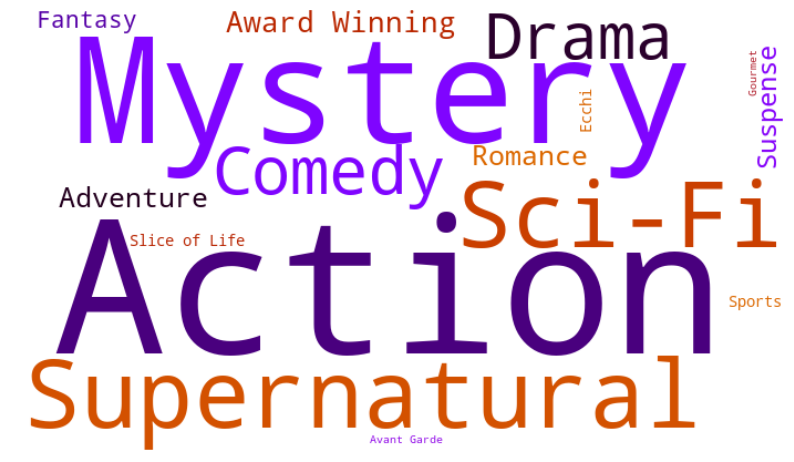

,Name,Genres
2,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy"
24,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural"
28,One Piece,"Action, Adventure, Fantasy"
39,Ansatsu Kyoushitsu,"Action, Comedy"
57,Shokugeki no Souma,"Gourmet, Ecchi"


In [86]:
# Get user preferences for the random user
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
pd.DataFrame(user_pref).head(5)


In [87]:
def get_recommended_animes(similar_users, user_pref, n=10):
    recommended_animes = []
    anime_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id))
        if not pref_list.empty:  # Check if user has watched any animes
            pref_list = pref_list[~pref_list["Name"].isin(user_pref["Name"].values)]
            anime_list.append(pref_list.Name.values)

    if len(anime_list) == 0:
        print("No anime recommendations available for the given users.")
        return pd.DataFrame()

    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    # Count the occurrences of each anime in the entire dataset
    anime_count = df_score['anime_id'].value_counts()

    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]
                n_user_pref = anime_count.get(anime_id, 0)  # Get the total count of users who have watched this anime
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name,
                    "Genres": genre,
                    "Synopsis": Synopsis
                })
            except:
                pass
    return pd.DataFrame(recommended_animes)

In [88]:
# Get recommended animes for the random user
recommended_animes = get_recommended_animes(similar_users, user_pref, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes


> Top recommendations for user: 98303


,n,anime_name,Genres,Synopsis
0,64625,Cowboy Bebop,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity has expanded across the galaxy, filling the surface of other planets with settlements like those on Earth. These new societies are plagued by murder, drug use, and theft, and intergalactic outlaws are hunted by a growing number of tough bounty hunters.\n\nSpike Spiegel and Jet Black pursue criminals throughout space to make a humble living. Beneath his goofy and aloof demeanor, Spike is haunted by the weight of his violent past. Meanwhile, Jet manages his own troubled memories while taking care of Spike and the Bebop, their ship. The duo is joined by the beautiful con artist Faye Valentine, odd child Edward Wong Hau Pepelu Tivrusky IV, and Ein, a bioengineered Welsh Corgi.\n\nWhile developing bonds and working to catch a colorful cast of criminals, the Bebop crew's lives are disrupted by a menace from Spike's past. As a rival's maniacal plot continues to unravel, Spike must choose between life with his newfound family or revenge for his old wounds."
1,45719,Shingeki no Kyojin,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called Titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal Titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations.\n\nAfter witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Eren, his adopted sister Mikasa Ackerman, and his childhood friend Armin Arlert join the brutal war against the Titans and race to discover a way of defeating them before the last walls are breached."
2,96950,Code Geass: Hangyaku no Lelouch,"Action, Award Winning, Drama, Sci-Fi","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence.\n\nLelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
3,42231,Steins;Gate,"Drama, Sci-Fi, Suspense","Eccentric scientist Rintarou Okabe has a never-ending thirst for scientific exploration. Together with his ditzy but well-meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable ""gadget"" the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of strange events that lead him to believe that there is more to the ""Phone Microwave"" gadget than meets the eye. Apparently able to send text messages in

***Recomendación basada en contenido***

In [89]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Define a generator to compute TF-IDF matrix on the fly
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U')))

# Compute cosine similarity matrix as a sparse matrix
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

In [90]:
# Function to get recommendations based on cosine similarity, genre, and ratings based on score
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Compute the similarity scores between the anime at the given index and all other animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out animes with unknown scores
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Sort the valid anime similarity scores based on the cosine similarity and ratings score in descending order
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Get the top 10 similar animes (excluding the anime itself)
    top_animes = [x for x in sorted_scores if x[0] != idx][:10]

    # Extract the indices of the recommended animes
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
    return recommended_animes

In [91]:
# Example usage: Get recommendations for an anime
anime_title = 'Naruto'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Naruto":


,Name,Genres,Score
414,Bleach: Sennen Kessen-hen,"Action, Adventure, Fantasy",9.07
9,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04
28,One Piece,"Action, Adventure, Fantasy",8.69
333,Hunter x Hunter,"Action, Adventure, Fantasy",8.41
16,Naruto: Shippuuden,"Action, Adventure, Fantasy",8.26
945,Jigokuraku,"Action, Adventure, Fantasy",8.26
1063,Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Fuka Shou - Yakusai-hen,"Action, Adventure, Fantasy",8.24
190,Magi: The Kingdom of Magic,"Action, Adventure, Fantasy",8.22
854,One Piece Movie 14: Stampede,"Action, Adventure, Fantasy",8.22
375,Dragon Ball Super: Broly,"Action, Adventure, Fantasy",8.16


In [92]:
model.save('mi_modelo.h5')